# A. Enunciado de la práctica

## 1. Objetivos de la práctica
El desarrollo de esta práctica pretende que el alumnado analice, diseñe e implemente soluciones a un problema usando las técnicas de computación evolutiva impartidas en la asignatura Inteligencia Artificial (IA). Para ello, el alumnado desarrollará de forma grupal (por cuartetos) un proyecto de programación en lenguaje Python mediante el uso del entorno de programación Google Colab y cuadernos de Python.

## 2. Caso de estudio
Se pretende resolver un problema de planificación de horarios para un grupo de los grados comunes de la E.T.S. de Ingeniería de Sistemas Informáticos. El problema de planificación de horarios consiste en distribuir $N$ asignaturas, cada una con un número $h_i$ de horas semanales, en un horario de $M$ días con $k$ horas por día, asegurando que se cumplan las siguientes restricciones:

* Cada hora de cada asignatura se debe impartir en un día y hora diferente, i.e. no puede haber solapamiento de horas.
* No se pueden impartir más de 2 horas de la misma asignatura el mismo día.

El objetivo es encontrar una planificación de horarios que tenga en cuenta las siguientes preferencias:

* Se desea que el horario sea lo más continuo posible, i.e. que no haya huecos vacíos al día entre asignatura y asignatura, o que este sea mínimo.
* Se desea que el horario sea lo más compacto posible, i.e. que se utilicen el menor número de días posibles.
* Se desea que si una asignatura imparte más de una hora al día, estas horas sean consecutivas.

Por ejemplo, si tenemos $N=3$ asignaturas (IA, ALG y BD) con las siguientes horas semanales: $h_1 = 1$, $h_2 = 2$ y $h_3 = 3$, y un horario de $M=3$ días con $k=3$ horas por día, una posible planificación sería:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  |  ALG   | BD     |       |
| Hora 2  |  ALG   | BD     |       |
| Hora 3  |  BD    | IA     |       |

Esta planificación cumple las restricciones, ya que no hay solapamiento de horas y no se imparten más de 2 horas de la misma asignatura el mismo día. Además, la solución es óptima ya que cumple todas las preferencias: no hay huecos entre asignaturas, el número de días es el menor posible y las horas de las asignaturas que se imparten más de una vez al día son consecutivas.

La siguiente solución sería válida, pero no óptima:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  |  IA    | BD     | ALG   |
| Hora 2  |        |        |       |
| Hora 3  |  BD    | BD     | ALG   |

Se puede apreciar que hay huecos entre asignaturas, que el número de días no es lo menor posible y que las horas de las asignaturas que se imparten más de una vez al día no son consecutivas.

Finalmente, se muestra un ejemplo de solución no válida:

|         | Día 1  | Día 2  | Día 3 |
|---------|--------|--------|-------|
| Hora 1  | IA/ALG | BD     |       |
| Hora 2  |  ALG   | BD     |       |
| Hora 3  |        | BD     |       |

Se puede apreciar que hay solapamiento de horas y que se imparten más de 2 horas de la misma asignatura el mismo día.

Para resolver este problema, se propone el uso de un algoritmo genético. El algoritmo genético deberá ser capaz de generar una población inicial de soluciones, evaluar la calidad de cada solución, seleccionar las mejores soluciones, cruzarlas y mutarlas para generar una nueva población de soluciones. El algoritmo deberá ser capaz de encontrar una solución óptima (o cercana al óptimo en los casos más complejos) en un tiempo razonable.

## 3. Desarrollo
El desarrollo de esta práctica supone completar este cuaderno de python para resolver el problema para varias configuraciones diferentes usando algoritmos genéticos. Además, usando este cuaderno de python, se quieren mostrar resultados de la ejecución de los algoritmos para extraer conclusiones sobre las configuraciones del problema. También se desea hacer una comparativa entre los algoritmos genéticos propuestos, las distintas representaciones propuestas, los distintos operadores y parámetros de configuración de los algoritmos genéticos, etc.

### 3.1 Primera aproximación

Como primera aproximación, se desarrollará un algoritmo genético para resolver el problema usando la siguiente representación y función de fitness:

* **Representación**: Cada solución será un array de tamaño $h_1 + h_2 + \ldots + h_N$ con alfabeto valores enteros en el rango $\Omega = [0, M \times k - 1]$. Cada valor del array representará la hora (con el correspondiente día) en la que se imparte cada hora de la asignatura $i$, i.e. si $sol_{i_0} = j$, la primera hora de la asignatura $i$ se imparte en el día $j // k$ y en la hora $j \% k$. E.g. en el ejemplo 1 del enunciado, la solución sería $sol = [5, 0, 1, 2, 3, 4]$.
* **Función de fitness**: La función de fitness se define mediante la siguiente fórmula:

$$ fitness(sol) = \left\{ \begin{array}{ll} 0 & \text{si } C_1 > 0 \; || \; C_2 > 0 \\ \\ \frac{1}{1+ P_1 + P_2 + P_3} & \text{en otro caso} \end{array} \right. $$

  donde:

* $C_1 =$ Número de solapamientos entre asignaturas. E.g. en el ejemplo 3 del enunciado, $C_1 = 1$. Si hubiera tres asignaturas a la vez en una misma hora, se consideraría un solapamiento de 2; si hubiera cuatro asignaturas a la vez en una misma hora, se consideraría un solapamiento de 3, etc.
* $C_2 =$ Número de horas por encima de 2 de una misma asignatura impartidas el mismo día. E.g. en el ejemplo 3 del enunciado, $C_2 = 1$.
* $P_1 =$ Número de huecos vacíos entre asignaturas. E.g. en el ejemplo 2 del enunciado, $P_1 = 3$. Si hubiera dos huecos entre asignaturas, se consideraría un hueco de 2; si hubiera tres huecos entre asignaturas, se consideraría un hueco de 3, etc.
* $P_2 =$ Número de días utilizados en los horarios. E.g. en el ejemplo 1 del enunciado, $P_2 = 2$.
* $P_3 =$ Número de asignaturas con horas NO consecutivas en un mismo día. E.g. en el ejemplo 2 del enunciado, $P_3 = 2$.

Utilizando la representación y función de fitness propuestas, se aplicará el algoritmo genético utilizando las siguiente configuración:
* **Población inicial**: $pop_{size}=50$ soluciones aleatorias.
* **Selección**: Selección por torneo con $T=2$.
* **Cruce**: Cruce de un punto con probabilidad $P_{cruce}=0.8$.
* **Mutación**: Mutación uniforme con probabilidad $P_{mut}=0.1$.
* **Selección ambiental (nueva población)**: Reemplazo generacional sin elitismo.
* **Criterio de parada**: Número de generaciones $n_{gens}=50$.

### 3.2 Aproximación final propuesta

Se deberá proponer una o varias aproximaciones finales para resolver el problema de planificación de horarios. Estas aproximaciones deberán ser diferentes a la propuesta en la primera aproximación y deberán justificarse adecuadamente. Para cada aproximación se deberá proponer e implementar:
* **Representación**: Se puede proponer una representación diferente a la propuesta en la primera aproximación. Se deberá justificar adecuadamente la elección de la representación.
* **Función de fitness**: Se puede proponer una función de fitness diferente a la propuesta en la primera aproximación. Se deberá justificar adecuadamente la elección de la función de fitness.
* **Operadores genéticos**: Se pueden proponer operadores genéticos (selección, cruce y mutación) diferentes a los propuestos en la primera aproximación. Se deberá justificar adecuadamente la elección de los operadores genéticos. También se puede proponer una selección ambiental diferente que mejore la convergencia del algoritmo (e.g. usar elitismo).
* **Configuración del algoritmo genético**: Se pueden proponer parámetros de configuración diferentes a los propuestos en la primera aproximación (probabilidades, $pop_{size}$, etc), así como proponer un criterio de parada diferente que mejore la convergencia del algoritmo (e.g. parar cuando la fitness se estanque). En ningún caso, $pop_{size}$ ni $n_{gens}$ podrán ser superiores a 100. Se deberá justificar adecuadamente la elección de los parámetros de configuración.

### Experimentación

Dada la naturaleza estocástica de los algoritmos genéticos, cada aproximación (con cada configuración que se pruebe) deberá ser evaluada al menos 31 veces con distintos números aleatorios (semillas). Para cada aproximación, se deberá proporcionar una tabla comparativa entre la primera aproximación y las aproximaciones finales propuestas. Se deberá hacer un análisis estadístico de los resultados obtenidos obteniendo la media y desviación estándar de las 31 ejecuciones tanto para los distintos indicadores de calidad (C1, C2, P1, P2, P3) de la mejor solución encontrada en cada ejecución, como para los tiempos de ejecución y el número de generación en el cual ha parado la ejecución.

En cada aproximación, se deberá mostrar gráficamente la evolución de la fitness de la mejor solución y de la media de la población en cada generación para la peor ejecución, la mejor ejecución y la ejecución media. Además, se deberá mostrar la mejor solución encontrada en cada una de estas tres ejecuciones.

Para cada aproximación propuesta se debe proporcionar una tabla de estas características (Puede usarse un generador de tablas https://www.tablesgenerator.com/markdown_tables o pandas https://pandas.pydata.org/docs/user_guide/index.html):

| Dataset | Algoritmo | Tiempo(s)   | Generaciones | C1        | C2        | P1        | P2        | P3        |
|---------|-----------|-------------|--------------|-----------|-----------|-----------|-----------|-----------|
|   1     |  Primero  | $10\pm 3.5$ | $50\pm 0$    | $1\pm 1$  | $2\pm 1$  | $1\pm 2$  | $3\pm 1$  | $2\pm 1$  |
|   1     |  Final 1  | $5 \pm 1.2$ | $38\pm 12$   | $0\pm 0$  | $0\pm 0$  | $0\pm 1$  | $2\pm 1$  | $0\pm 1$  |
|   2     |  Final 1  | $25\pm 2.3$ | $73\pm 22$   | $0\pm 0$  | $0\pm 1$  | $1\pm 1$  | $3\pm 0$  | $1\pm 1$  |

## 4. Normativa de la práctica
Para el desarrollo del proyecto de programación se proporciona este cuaderno que sirve a modo de proyecto de programación. Se han propuesto varias configuraciones de horarios para utilizar en las distintas pruebas. Se permiten crear todas las funciones adicionales que sea necesario siempre y cuando se respete la estructura general de este cuaderno. Este cuaderno es el único entregable, por tanto desarrollar código fuera de él no es recomendable.

Además de explicar las decisiones tomadas, será necesario realizar una comparativa de resultados en una o varias tablas, así como incluir una comparativa final.

La práctica debe realizarse teniendo en cuenta la siguiente normativa:
* NO está permitido alterar los nombres, parámetros ni tipo de retorno de ninguno de los métodos proporcionados. El método modificado se evaluará como 0 así como todos los métodos que dependan de él.
* No está permitido el uso de librerías externas excepto numpy y pandas. El uso de librerías externas hará que se evalúe la práctica como 0.
* La práctica se realizará de forma grupal (grupos de 4 alumnos). Cada grupo deberá desarrollar de manera independiente su propia práctica y realizar su propia entrega.
* El plagio de la práctica queda estrictamente prohibido. La detección de plagio supondrá una calificación de 0 en la convocatoria de la asignatura para todos los alumnos implicados, así como la posibilidad de apertura de expediente académico disciplinar.
* Para ser evaluado de la práctica es obligatorio entregarla en plazo, habiendo realizado correctamente al menos una funcionalidad de las pedidas. Una entrega fuera de plazo será evaluada como 0.
* Usa este cuaderno a modo de memoria, justificando las decisiones que tomes a lo largo del proceso de desarrollo. El desarrollo en texto puntúa de cara a la nota de la práctica.
* De cara a la entrega es estrictamente necesario entregar el cuaderno ejecutado al completo. Una entrega que no haya sido ejecutada con éxito hasta la última celda será evaluada como 0. (Entregad el archivo .ipynb)
* Se debe comentar el código adecuadamente. Este apartado es puntuable.

# Cuerpo de la práctica
Usa las siguientes celdas para desarrollar todo el código pedido. Recuerda respetar esta estructura general y añadir celdas siempre dentro de cada apartado.

# Primera Aproximación

## Representación y función de fitness

### Representación

In [1]:
# Ejemplo de dataset de entrada para el problema de asignación de horarios
dataset = {"n_courses" : 3,
           "n_days" : 3,
           "n_hours_day" : 3,
           "courses" : [("IA", 1), ("ALG", 2), ("BD", 3)]}

In [5]:
import numpy as np
np.random.seed(1234567890)

def generate_random_array_int(alphabet, length):
    # Genera un array de enteros aleatorios de tamaño length
    # usando el alfabeto dado
    indices = np.random.randint(0, len(alphabet), length)
    return np.array(alphabet)[indices]

def generate_initial_population_timetabling(pop_size, *args, **kwargs):
    dataset = kwargs['dataset'] # Dataset con la misma estructura que el ejemplo
    # Obtener el alfabeto y la longitud a partir del dataset
    alphabet = get_alphabet(dataset)

    courses = dataset.get("courses")
    length = sum([course[1] for course in courses])

    # Genera una población inicial de tamaño pop_size
    population = [generate_random_array_int(alphabet, length) for _ in range(pop_size)]

    return population

def get_alphabet(dataset):
    days = dataset.get("n_days")  # M
    hours_day = dataset.get("n_hours_day")  # K
    return list(range(days * hours_day))  # Omega = {0, M x K - 1}

In [3]:
################################# NO TOCAR #################################
#                                                                          #
def print_timetabling_solution(solution, dataset):
    # Imprime una solución de timetabling
    n_days = dataset['n_days']
    n_hours_day = dataset['n_hours_day']
    courses = dataset['courses']

    # Crea una matriz de n_days x n_hours_day
    timetable = [[[] for _ in range(n_hours_day)] for _ in range(n_days)]

    # Llena la matriz con las asignaturas
    i = 0
    max_len = 6 # Longitud del título Día XX
    for course in courses:
        for _ in range(course[1]):
            day = solution[i] // n_hours_day
            hour = solution[i] % n_hours_day
            timetable[day][hour].append(course[0])
            i += 1
            # Calcula la longitud máxima del nombre de las asignaturas
            # en una misma franja horaria
            max_len = max(max_len, len('/'.join(timetable[day][hour])))

    # Imprime la matriz con formato de tabla markdown
    print('|         |', end='')
    for i in range(n_days):
        print(f' Día {i+1:<2}{" "*(max_len-6)} |', end='')
    print()
    print('|---------|', end='')
    for i in range(n_days):
        print(f'-{"-"*max_len}-|', end='')
    print()
    for j in range(n_hours_day):
        print(f'| Hora {j+1:<2} |', end='')
        for i in range(n_days):
            s = '/'.join(timetable[i][j])
            print(f' {s}{" "*(max_len-len(s))}', end=' |')
        print()
#                                                                          #
################################# NO TOCAR #################################

In [4]:
# Ejemplo de uso de la función generar individuo con el dataset de ejemplo
candidate = generate_random_array_int(list(range(9)), 6)
print(candidate)
print_timetabling_solution(candidate, dataset)

[2 6 3 1 4 0]
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     | ALG    | ALG    |
| Hora 2  | BD     | BD     |        |
| Hora 3  | IA     |        |        |


### Función de fitness

In [5]:
from collections import Counter, defaultdict

def calculate_c1(solution, *args, **kwargs):
    """Calcula la cantidad de asignaturas que se imparten en mismas franjas horarias"""
    counts = Counter(solution)
    # Contamos todas las apariciones de las horas y sumamos C-1 si C > 1 que son los casos de horas repetidas / solapadas
    c1 = sum([count - 1 for count in counts.values() if count > 1])
    return c1

def calculate_c2(solution, *args, **kwargs):
    """Calcula la cantidad de horas por encima de 2 que se imparten de una misma asignatura en un mismo día"""
    dataset = kwargs['dataset']

    c2 = 0

    # Cogemos las horas por asignatura
    hours_by_course = {}
    previous=0
    for course in dataset["courses"]:
        course_name = course[0]
        next = course[1] + previous
        hours_by_course[course_name] = solution[previous:next]
        previous = next

    # Para cada asignatura calculamos si hay más de 2 horas seguidas
    for course, hours in hours_by_course.items():
        hours_a_day = defaultdict(int)
        # Vamos a eliminar los duplicados / horas solapadas, dado que estas se computan en C1
        hours = list(set(hours))
        for hour in hours:
            day = hour // dataset["n_hours_day"]  # Day = j // k
            hours_a_day[day] += 1

        # Contar los excesos para C2
        for day, count in hours_a_day.items():
            if count > 2:
                c2 += count - 2
    return c2

def calculate_p1(solution, *args, **kwargs):
    """Calcula el número de huecos vacíos entre asignaturas"""
    dataset = kwargs['dataset']
    p1 = 0

    # Agrupamos por días
    hours_by_day = defaultdict(list)
    for j in solution:
        day = j // dataset["n_hours_day"]  # Day = j//k
        hour = j % dataset["n_hours_day"]  # hour = j%k
        hours_by_day[day].append(hour)

    for day, hours in hours_by_day.items():
        # Quitamos solapamientos
        hours = list(set(hours))

        # Ordenamos las horas
        hours.sort()

        # Sumamos la diferencia entre horas en un mismo dia -1, estos serán los huecos
        # Ej: 3 - 2 - 1 = 0 => como 3 y 2 son consecutivas no hay hueco
        # Ej: 4 - 2 - 1 = 1 => hay 1 hueco entre la 1º hora y la 2º hora
        previous = hours[0] - 1
        for next_hour in hours:
            p1 += next_hour - previous - 1
            previous = next_hour

    return int(p1)  # Cast to int to avoid errors with np.int64() and statistics.stdev()

def calculate_p2(solution, *args, **kwargs):
    """Calcula el número de días utilizados en los horarios"""
    dataset = kwargs['dataset']
    
    # Calculo valido solo si también tenemos en cuenta los días vacíos entre medias
    # days = max(solution) // dataset["n_hours_day"] + 1 # Day = j//k


    # De esta forma contamos solo los días con algún horario
    days = set()  # Usamos un set para eliminar duplicados
    for j in solution:
        day = j // dataset["n_hours_day"]  # Day = j//k
        days.add(day)

    return len(days)

def calculate_p3(solution, *args, **kwargs):
    """Calcula el número de asignaturas con horas NO consecutivas en un mismo día"""
    dataset = kwargs['dataset']
    p3 = 0
    
    # Cogemos las horas por asignatura / dia
    hours_by_course = defaultdict(lambda: defaultdict(list))
    previous=0
    for course in dataset["courses"]:
        course_name = course[0]
        next = course[1] + previous
        course_hours = solution[previous:next]
        for j in course_hours:
            day = j // dataset["n_hours_day"]  # Day = j//k
            hour = j % dataset["n_hours_day"]  # Hour = j%k
            hours_by_course[course_name][day].append(hour)
        previous = next

    # Por cada curso
    for course, days in hours_by_course.items():
        # Por cada dia
        for day, hours in days.items():
            # Las ordenamos para tenerlas consecutivas y poder restarlas
            hours.sort()
                
            previous_hour = hours[0] - 1
            # Similar al calculo de huecos entre asignaturas
            for next_hour in hours:
                # En este caso si la diferencia es mayor a 1 entonces hay un hueco
                if next_hour - previous_hour > 1:
                    p3 += 1
                previous_hour = next_hour

    return p3

def fitness_timetabling(solution, *args, **kwargs):
    """Calcula el fitness de una solución de timetabling siguiendo la fórmula del enunciado"""
    dataset = kwargs['dataset']

    # f() => 0 si c1 > 0 or c2 > 0
    # f() => 1 / 1 + p1 + p2 + p3

    c1 = calculate_c1(solution, *args, **kwargs)
    if c1 > 0:
        return 0
    
    c2 = calculate_c2(solution, *args, **kwargs)
    if c2 > 0:
        return 0
    
    p1 = calculate_p1(solution, *args, **kwargs)
    p2 = calculate_p2(solution, *args, **kwargs)
    p3 = calculate_p3(solution, *args, **kwargs)
    f = 1 / (1 + p1 + p2 + p3)
    return f

# Pistas:
# - Una función que devuelva la tabla de horarios de una solución
# - Una función que devuelva la cantidad de horas por día de cada asignatura
# - A través de args y kwargs se pueden pasar argumentos adicionales que vayamos a necesitar

#### Test

In [6]:
# For debug purpose
candidate_aux = [4, 0, 2, 1, 3, 5]
# candidate_aux = generate_random_array_int(list(range(9)), 6)
print_timetabling_solution(candidate_aux, dataset)
print()
print(f"C1 = {calculate_c1(candidate_aux, dataset=dataset):<10}({calculate_c1.__doc__})")
print(f"C2 = {calculate_c2(candidate_aux, dataset=dataset):<10}({calculate_c2.__doc__})")
print(f"P1 = {calculate_p1(candidate_aux, dataset=dataset):<10}({calculate_p1.__doc__})")
print(f"P2 = {calculate_p2(candidate_aux, dataset=dataset):<10}({calculate_p2.__doc__})")
print(f"P3 = {calculate_p3(candidate_aux, dataset=dataset):<10}({calculate_p3.__doc__})")
print(f"F  = {fitness_timetabling(candidate_aux, dataset=dataset):<10}({fitness_timetabling.__doc__})")

|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | ALG    | BD     |        |
| Hora 2  | BD     | IA     |        |
| Hora 3  | ALG    | BD     |        |

C1 = 0         (Calcula la cantidad de asignaturas que se imparten en mismas franjas horarias)
C2 = 0         (Calcula la cantidad de horas por encima de 2 que se imparten de una misma asignatura en un mismo día)
P1 = 0         (Calcula el número de huecos vacíos entre asignaturas)
P2 = 2         (Calcula el número de días utilizados en los horarios)
P3 = 2         (Calcula el número de asignaturas con horas NO consecutivas en un mismo día)
F  = 0.2       (Calcula el fitness de una solución de timetabling siguiendo la fórmula del enunciado)


In [7]:
fitness_timetabling(candidate, dataset=dataset) # Devuelve la fitness del candidato de ejemplo

0.25

## Operadores genéticos

### Selección por torneo

In [8]:
def tournament_selection(population, fitness, number_parents, *args, **kwargs):
    t = kwargs['tournament_size'] # Tamaño del torneo
    # Selecciona number_parents individuos de la población mediante selección por torneo
    # Torneo = T -> population
    parents = []
    for _ in range(number_parents):
        selected_parents = []
        fitness_s_parents = []
        for _ in range(t):
            point = np.random.randint(0,len(population)-1)
            selected_parents.append(population[point])
            fitness_s_parents.append(fitness(population[point], **kwargs))
            # print_timetabling_solution(population[point], dataset)
            # print("Fitness: " + str(fitness(population[point], **kwargs)))

        parents.append(selected_parents[fitness_s_parents.index(max(fitness_s_parents))])
    return parents


# Pista:
# - Crear una función auxiliar que genere un padre a partir de una selección por torneo
# - Recuerda usar la misma librería de números aleatorios que en el resto del código


In [9]:
imp_bonito = tournament_selection(generate_initial_population_timetabling(50, dataset=dataset), fitness_timetabling, 1, tournament_size=2, dataset=dataset)
print_timetabling_solution(imp_bonito[0], dataset)

|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     |        |        |
| Hora 2  |        | IA/ALG |        |
| Hora 3  | ALG    | BD/BD  |        |


### Cruce de un punto

In [10]:
def one_point_crossover(parent1, parent2, p_cross, *args, **kwargs):
    # Realiza el cruce de dos padres con una probabilidad p_cross

    # NOTA: copiado del ejemplo "algoritmo_genetico.ipynb"
    if np.random.random() < p_cross:
        # print("Cross")
        point = np.random.randint(1,len(parent1)-1)
        # print(f"Cross {point=}")
        child1 = np.append(parent1[:point],parent2[point:])
        child2 = np.append(parent2[:point],parent1[point:])
        return child1, child2
    else:
        # print("No Cross")
        return parent1, parent2

#### Test

In [11]:
# For debug purpose
parent1 = generate_random_array_int(list(range(9)), 6)
parent2 = generate_random_array_int(list(range(9)), 6)
child1, child2 = one_point_crossover(parent1, parent2, 0.8)

print("Parent 1".center(40, "-"))
print(parent1)
print_timetabling_solution(parent1, dataset=dataset)
print("Parent 2".center(40, "-"))
print(parent2)
print_timetabling_solution(parent2, dataset=dataset)
print("Child 1".center(40, "-"))
print(child1)
print_timetabling_solution(child1, dataset=dataset)
print("Child 2".center(40, "-"))
print(child2)
print_timetabling_solution(child2, dataset=dataset)

----------------Parent 1----------------
[5 1 2 5 6 3]
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  |        | BD     | BD     |
| Hora 2  | ALG    |        |        |
| Hora 3  | ALG    | IA/BD  |        |
----------------Parent 2----------------
[6 6 7 6 5 1]
|         | Día 1     | Día 2     | Día 3     |
|---------|-----------|-----------|-----------|
| Hora 1  |           |           | IA/ALG/BD |
| Hora 2  | BD        |           | ALG       |
| Hora 3  |           | BD        |           |
----------------Child 1-----------------
[5 1 2 5 6 3]
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  |        | BD     | BD     |
| Hora 2  | ALG    |        |        |
| Hora 3  | ALG    | IA/BD  |        |
----------------Child 2-----------------
[6 6 7 6 5 1]
|         | Día 1     | Día 2     | Día 3     |
|---------|-----------|-----------|-----------|
| Hora 1  |           |           | IA/ALG/BD |
| Hora

### Mutación uniforme

In [12]:
def uniform_mutation(chromosome, p_mut, *args, **kwargs):
    dataset = kwargs['dataset'] # Dataset con la misma estructura que el ejemplo
    # Realiza la mutación gen a gen con una probabilidad p_mut
    # Obtener el alfabeto del dataset para aplicar la mutación
    
    alphabet = get_alphabet(dataset)
    
    # NOTA: copiado del ejemplo "algoritmo_genetico.ipynb"
    child = np.copy(chromosome)
    random_values = np.random.random(len(chromosome))
    # print(f"{random_values=}")
    mask = random_values < p_mut
    # print(f"{mask=}")
    indices = np.random.randint(0, len(alphabet), size=np.count_nonzero(mask))
    # print(f"{indices=}")
    child[mask] = np.array(alphabet)[indices]
    return child

#### Test

In [13]:
# For debug purpose
chromosome = generate_random_array_int(list(range(9)), 6)
mutated = uniform_mutation(chromosome, 0.1, dataset=dataset)

print("Original".center(40, "-"))
print(chromosome)
print_timetabling_solution(chromosome, dataset=dataset)

print("Mutated".center(40, "-"))
print(mutated)
print_timetabling_solution(mutated, dataset=dataset)

----------------Original----------------
[6 3 7 8 1 2]
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  |        | ALG    | IA     |
| Hora 2  | BD     |        | ALG    |
| Hora 3  | BD     |        | BD     |
----------------Mutated-----------------
[6 3 7 8 1 2]
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  |        | ALG    | IA     |
| Hora 2  | BD     |        | ALG    |
| Hora 3  | BD     |        | BD     |


### Selección ambiental (reemplazo generacional)

In [14]:
def generational_replacement(population, fitness, offspring, fitness_offspring, *args, **kwargs):
    # Realiza la sustitución generacional de la población
    # Debe devolver tanto la nueva población como el fitness de la misma

    # Como tenemos un remplazo generacional sin elitismo, sustituimos la población por todos sus hijos
    return offspring, fitness_offspring

## Algoritmo genético

### Condición de parada (número de generaciones)

In [15]:
def generation_stop(generation, fitness, *args, **kwargs):
    max_gen=kwargs['max_gen']
    # Comprueba si se cumple el criterio de parada (máximo número de generaciones)
    return generation >= max_gen

### Algoritmo genético

In [16]:
from statistics import mean
from itertools import chain

def genetic_algorithm(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
                      selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    # Aplica un algoritmo genético a un problema de maximización
    population = None # Crea la población de individuos de tamaño pop_size
    fitness = None # Contiene la evaluación de la población
    best_fitness = [] # Guarda el mejor fitness de cada generación
    mean_fitness = [] # Guarda el fitness medio de cada generación
    generation = 0 # Contador de generaciones

    # 1 - Inicializa la población con la función generate_population
    population = generate_population(pop_size, *args, **kwargs)

    # 2 - Evalúa la población con la función fitness_function
    fitness = [fitness_function(solution, *args, **kwargs) for solution in population]
    best_fitness.append(max(fitness))
    mean_fitness.append(mean(fitness))

    # 3 - Mientras no se cumpla el criterio de parada stopping_criteria
    while not stopping_criteria(generation, fitness, *args, **kwargs):
        # 4 - Selección de padres con la función selection
        parents = selection(population, fitness_function, offspring_size, *args, **kwargs)

        # 5 - Cruce de padres mediante la función crossover con probabilidad p_cross
        offspring = list(chain.from_iterable(crossover(parents[i], parents[i+1], p_cross, *args, **kwargs) for i in range(0, len(parents), 2)))

        # 6 - Mutación de los descendientes con la función mutation con probabilidad p_mut
        offspring = [mutation(child, p_mut, *args, **kwargs) for child in offspring]

        # 7 - Evaluación de los descendientes
        offspring_fitness = [fitness_function(child, *args, **kwargs) for child in offspring]
        best_fitness.append(max(offspring_fitness))
        mean_fitness.append(mean(offspring_fitness))

        # 8 - Generación de la nueva población con la función environmental_selection
        population, fitness = environmental_selection(population, fitness, offspring, offspring_fitness, *args, **kwargs)
        generation += 1

    return population, fitness, generation, best_fitness, mean_fitness

In [17]:
# For debug
population, fitness, generation, best_fitness, mean_fitness = genetic_algorithm(generate_initial_population_timetabling, 50, fitness_timetabling, generation_stop, 50, tournament_selection, one_point_crossover, 0.8, uniform_mutation, 0.1, generational_replacement, dataset=dataset, max_gen=50, tournament_size=2)
print(f"{len(population)=}")
print(f"{population=}")
print(f"{len(fitness)=}")
print(f"{fitness=}")
print(f"{generation=}")
print(f"{len(best_fitness)=}")
print(f"{best_fitness=}")
print(f"{len(mean_fitness)=}")
print(f"{mean_fitness=}")

len(population)=50
population=[array([1, 6, 5, 3, 7, 0]), array([4, 2, 8, 5, 6, 0]), array([1, 3, 5, 3, 7, 0]), array([5, 4, 6, 8, 7, 0]), array([1, 2, 5, 3, 7, 0]), array([1, 4, 5, 3, 3, 2]), array([1, 2, 3, 4, 6, 0]), array([1, 4, 6, 8, 7, 0]), array([1, 4, 6, 5, 7, 4]), array([1, 4, 3, 5, 7, 0]), array([1, 2, 1, 3, 2, 0]), array([1, 4, 7, 3, 4, 0]), array([1, 4, 2, 6, 7, 0]), array([1, 4, 6, 8, 7, 0]), array([1, 4, 1, 3, 2, 0]), array([1, 2, 2, 5, 7, 0]), array([4, 2, 7, 3, 7, 0]), array([1, 4, 5, 3, 7, 0]), array([2, 4, 1, 3, 3, 0]), array([6, 4, 0, 3, 2, 0]), array([4, 4, 0, 0, 2, 0]), array([6, 4, 6, 8, 7, 0]), array([1, 4, 7, 3, 2, 0]), array([1, 4, 2, 5, 7, 0]), array([1, 4, 1, 3, 2, 0]), array([6, 4, 0, 3, 2, 0]), array([1, 2, 3, 4, 7, 0]), array([1, 8, 6, 5, 7, 4]), array([6, 8, 5, 3, 3, 2]), array([1, 8, 1, 5, 6, 0]), array([1, 4, 2, 8, 4, 0]), array([7, 4, 4, 8, 7, 0]), array([1, 2, 5, 3, 7, 0]), array([1, 2, 7, 3, 7, 0]), array([1, 8, 6, 3, 1, 0]), array([1, 2, 1, 3, 7, 0]

# Aproximación final propuesta
Usa las siguientes celdas para desarrollar la aproximación final propuesta. Elimina aquellas que no apliquen en tu caso.

# TODO: Xema y Cova revisar
Para la propuesta final vamos a variar 1 componente respecto a la primera aproximación y vamos a valorar su comportamiento respecto a la fitness para cada uno de los datasets proporcionados.

La idea es ver que apartados son mas susceptibles a mejoras de forma individual y posteriormente unirlos todos en una ultima prueba y ver la mejora conjunta.

## Representación y función de fitness propuestas

### Representación(es) propuesta(s)

In [18]:
### Coloca aquí tus funciones propuestas para la generación de población inicial ###
# TODO: eliminar si con se implementa

### Función(es) de fitness propuesta(s)

In [19]:
### Coloca aquí tus funciones de fitness propuestas ###
# TODO: eliminar si con se implementa

## Operadores genéticos

### Selección

In [20]:
### Coloca aquí tus funciones de selección propuestas ###
# TODO: Xema => Hacer selección estándar (ruleta de la fortuna)
def seleccion_estandar():
    pass

# TODO: Xema => Hacer selección por rango
def seleccion_rango():
    pass

### Cruce

In [21]:
### Coloca aquí tus funciones de cruce propuestas ###
# TODO: Guille => Hacer cruce por orden
def cruce_por_orden(parent1, parent2, p_cross, *args, **kwargs):
    # Comprobamos con p_cross si hay cruce
    if np.random.random() < p_cross:
        # Generamos un rango aleatorio
        point1 = np.random.randint(1, len(parent1) - 1)
        point2 = np.random.randint(1, len(parent1) - 1)

        # Los ordenamos para poder usar slicing
        point1, point2 = min(point1, point2), max(point1, point2)

        # print(f"Rango [{point1, point2}]")

        # Inicializamos los hijos a -1
        # -1 dado que no es un valor del alfabeto
        child1 = [-1]*len(parent1)
        child2 = [-1]*len(parent1)

        # Añadimos el rango seleccionado de cada padre
        child1[point1:point2] = parent1[point1:point2]
        child2[point1:point2] = parent2[point1:point2]

        # Ahora rellenamos con los valores del padre opuesto
        child1 = rellenar_hijo(parent2, child1, point1, point2)
        child2 = rellenar_hijo(parent1, child2, point1, point2)

        return child1, child2
    
    return parent1, parent2

def rellenar_hijo(parent, child, point1, point2):
    child_index = 0
    for value in parent:
        if value not in child:
            # Comprobamos que no metamos nada en el rango
            while(point1 <= child_index < point2):
                child_index += 1

            # Añadimos el valor
            child[child_index] = value

            # Incrementamos el indice
            child_index += 1

            # Hemos terminado de rellenar al hijo
            if child_index >= len(parent1):
                break

    return child

# For debug
padre1 = [1,2,3,4,5,6,7]
padre2 = [2,5,7,3,1,4,6]
print(f"{padre1=}")
print(f"{padre2=}")
hijo1, hijo2 = cruce_por_orden(padre1, padre2, 0.7)
print(f"{hijo1=}")
print(f"{hijo2=}")

padre1=[1, 2, 3, 4, 5, 6, 7]
padre2=[2, 5, 7, 3, 1, 4, 6]
hijo1=[1, 2, 3, 4, 5, 6, 7]
hijo2=[2, 5, 7, 3, 1, 4, 6]


### Mutación

In [116]:
import numpy as np

# TODO: Cova => Hacer mutación por intercambio
def mutacion_intercambio(p_mutation, cromosoma):
    if np.random.random() < p_mutation:
        array_valores = [0] * (len(cromosoma) + 1)  # +1 para incluir el 1 al final
        num_aleatorio_g1 = np.random.random()
        num_aleatorio_g2 = np.random.random()

        valor = 1 / len(cromosoma)
       
        i = 0
        while i < len(cromosoma):
            array_valores[i] = valor * i
            i += 1
        array_valores[len(cromosoma)] = 1  # Asegurarse de incluir el 1 al final

        primer_gen = None
        segundo_gen = None
        for i in range(len(array_valores) - 1):
            if array_valores[i] <= num_aleatorio_g1 < array_valores[i + 1]:
                print(f"El número aleatorio {num_aleatorio_g1} cae entre {array_valores[i]} y {array_valores[i + 1]}")
                primer_gen = i #modificacion i+1 
                break
        for i in range(len(array_valores) - 1):
            if array_valores[i] <= num_aleatorio_g2 < array_valores[i + 1]:
                print(f"El número aleatorio {num_aleatorio_g2} cae entre {array_valores[i]} y {array_valores[i + 1]}")
                segundo_gen = i #modificacion i+1 
                break

        if primer_gen is not None and segundo_gen is not None:
            print(f"El primer gen esta en la posicion: {primer_gen+1}")
            print(f"El segundo gen esta en la posicion: {segundo_gen+1}")
        else:
            print("No se encontraron rangos adecuados para ambos números aleatorios.")
        val = cromosoma[primer_gen]
        cromosoma[primer_gen] = cromosoma[segundo_gen]
        print(cromosoma[primer_gen])
        cromosoma[segundo_gen] = val
        print(cromosoma)
    else: 
        print("no se realiza la mutacion por intercambio, probabilidad insuficiente")

# Definir el array correctamente
array = [1, 5, 3, 6, 4]
mutacion_intercambio(0.6, array)

# TODO: Cova => Hacer mutación por inserción
def mutacion_insercion(p_mutation, cromosoma):
    if np.random.random() < p_mutation:
        array_valores = [0] * (len(cromosoma) + 1)  # +1 para incluir el 1 al final
        num_aleatorio_g1 = np.random.random()
        num_aleatorio_g2 = np.random.random()

        valor = 1 / len(cromosoma)
       
        for i in range(len(cromosoma)):
            array_valores[i] = valor * i
        array_valores[len(cromosoma)] = 1  # Asegurarse de incluir el 1 al final

        # Imprimir el array de valores
        print("Array de valores:", array_valores)

        primer_gen = None
        segundo_gen = None

        # Encontrar el rango para el primer gen
        for i in range(len(array_valores) - 1):
            if array_valores[i] <= num_aleatorio_g1 < array_valores[i + 1]:
                primer_gen = i
                break

        # Encontrar el rango para el segundo gen
        for i in range(len(array_valores) - 1):
            if array_valores[i] <= num_aleatorio_g2 < array_valores[i + 1]:
                segundo_gen = i
                break

        # Validar que los índices estén dentro del rango del cromosoma
        if (
            primer_gen is not None
            and segundo_gen is not None
            and 0 <= primer_gen < len(cromosoma)
            and 0 <= segundo_gen < len(cromosoma)
        ):
            print(f"El primer gen está en la posición: {primer_gen}")
            print(f"El segundo gen está en la posición: {segundo_gen}")

            # Insertar el valor del primer gen en la posición del segundo gen
            valor_a_insertar = cromosoma[primer_gen]
            cromosoma.pop(primer_gen)  # Eliminar el primer gen
            if primer_gen < segundo_gen:
                segundo_gen -= 1  # Ajustar el índice si el primer gen estaba antes del segundo
            cromosoma.insert(segundo_gen, valor_a_insertar)  # Insertar en la posición del segundo gen

            print(f"Cromosoma después de la mutación: {cromosoma}")
        else:
            print("Índices generados están fuera de rango o no se encontraron rangos adecuados.")
    else:
        print("no se realiza mutación por insercion, probabilidad insuficiente.")
# Prueba de la función
array = [1, 5, 3, 6, 4]
mutacion_insercion(0.6, array)

El número aleatorio 0.7664648315141744 cae entre 0.6000000000000001 y 0.8
El número aleatorio 0.31083338616769185 cae entre 0.2 y 0.4
El primer gen esta en la posicion: 4
El segundo gen esta en la posicion: 2
5
[1, 6, 3, 5, 4]
Array de valores: [0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1]
El primer gen está en la posición: 4
El segundo gen está en la posición: 1
Cromosoma después de la mutación: [1, 4, 5, 3, 6]


### Selección ambiental

In [23]:
### Coloca aquí tus funciones de reemplazo propuestas ###
# TODO: Guille => Hacer selección por Elitismo
def generational_replacement_with_elitism(population, fitness, offspring, fitness_offspring, *args, **kwargs):
    elitism = kwargs["elitism"]

    # Obtenemos los N mejores padres para el elitismo
    # Juntamos la población con su fitness
    population_fitness = zip(population, fitness)

    # Los ordenamos por su fitness
    population_fitness = sorted(population_fitness, key=lambda x: x[1], reverse=True)

    elite_population, elite_population_fitness = zip(*(list(x) for x in population_fitness[:elitism]))

    # Ahora hacemos lo mismo para los descendientes
    # Juntamos la población con su fitness
    offspring_with_fitness = zip(offspring, fitness_offspring)

    # Los ordenamos por su fitness
    offspring_with_fitness = sorted(offspring_with_fitness, key=lambda x: x[1])  # En este caso ordenamos de peor a mejor

    # Nos quedamos con los len()-N mejores de la descendencia
    best_offspring, best_offspring_fitness = zip(*(list(x) for x in offspring_with_fitness[elitism:]))


    # Unimos la elite con la mejor descendencia
    new_generation = list(elite_population + best_offspring)
    new_fitness = list(elite_population_fitness + best_offspring_fitness)

    return new_generation, new_fitness

# For debug
pop_size=10
population = generate_initial_population_timetabling(pop_size, dataset=dataset)
population_fitness = [fitness_timetabling(x, dataset=dataset) for x in population]
offspring = generate_initial_population_timetabling(pop_size, dataset=dataset)
offspring_fitness = [fitness_timetabling(x, dataset=dataset) for x in offspring]

new_generation, new_fitness = generational_replacement_with_elitism(population, population_fitness, offspring, offspring_fitness, elitism=2)
print("Population".center(20, "-"))
for i in range(pop_size):
    print(f"{np.array2string(population[i])}")
    print(f"{population_fitness[i]}")
print("Offspring".center(20, "-"))
for i in range(pop_size):
    print(f"{np.array2string(offspring[i])}")
    print(f"{offspring_fitness[i]}")
print("New Population".center(20, "-"))
for i in range(pop_size):
    print(f"{np.array2string(new_generation[i])}")
    print(f"{new_fitness[i]}")

-----Population-----
[5 1 1 7 4 1]
0
[3 8 0 8 1 1]
0
[8 4 0 5 2 4]
0
[3 0 5 5 6 0]
0
[7 8 0 6 6 6]
0
[7 2 8 5 3 1]
0.16666666666666666
[7 8 1 3 7 4]
0
[1 5 3 5 5 1]
0
[3 5 6 0 7 2]
0.14285714285714285
[7 0 1 3 3 2]
0
-----Offspring------
[4 8 6 1 7 5]
0.2
[0 6 6 5 1 7]
0
[4 5 3 0 1 4]
0
[6 6 1 1 0 2]
0
[3 0 5 3 2 4]
0
[7 0 5 5 3 4]
0
[1 8 3 5 7 3]
0
[7 6 7 7 5 3]
0
[8 1 8 2 2 7]
0
[3 2 7 2 2 6]
0
---New Population---
[7 2 8 5 3 1]
0.16666666666666666
[3 5 6 0 7 2]
0.14285714285714285
[6 6 1 1 0 2]
0
[3 0 5 3 2 4]
0
[7 0 5 5 3 4]
0
[1 8 3 5 7 3]
0
[7 6 7 7 5 3]
0
[8 1 8 2 2 7]
0
[3 2 7 2 2 6]
0
[4 8 6 1 7 5]
0.2


### Criterio de parada

In [24]:
### Coloca aquí tus funciones de parada propuestas ###
# TODO: Guille => Hacer criterio de parada por fitness
def generation_stop_by_fitness(generation, fitness, *args, **kwargs):
    max_fitness = kwargs["max_fitness"]
    return max_fitness >= max(fitness)

# Experimentos
Usa la función `run_ga` para extraer resultados.

## Utilidades
Usa estas funciones pre-programadas para ejecutar los experimentos y resumir el código.

### Temporizador

In [25]:
################################# NO TOCAR #################################
#                                                                          #
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        res = func(*args, **kwargs)
        end = time.time()
        return *res, end - start
    return wrapper
#                                                                          #
################################# NO TOCAR #################################

# Este codigo temporiza la ejecución de una función cualquiera

### Envoltorios

In [26]:
################################# NO TOCAR #################################
#                                                                          #
@timer
def run_ga(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
           selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    # Además del retorno de la función, se devuelve el tiempo de ejecución en segundos
    return genetic_algorithm(generate_population, pop_size, fitness_function, stopping_criteria, offspring_size,
                             selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs)
#                                                                          #
################################# NO TOCAR #################################


### Datasets
Configuraciones de horarios para utilizar en las pruebas.

In [27]:
# Se deben probar los 6 datasets
dataset1 = {"n_courses" : 3,
            "n_days" : 3,
            "n_hours_day" : 3,
            "courses" : [("IA", 1), ("ALG", 2), ("BD", 3)]}

dataset2 = {"n_courses" : 4,
            "n_days" : 3,
            "n_hours_day" : 4,
            "courses" : [("IA", 1), ("ALG", 2), ("BD", 3), ("POO", 2)]}

dataset3 = {"n_courses" : 4,
            "n_days" : 4,
            "n_hours_day" : 4,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4)]}

dataset4 = {"n_courses" : 5,
            "n_days" : 4,
            "n_hours_day" : 6,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4)]}

dataset5 = {"n_courses" : 7,
            "n_days" : 4,
            "n_hours_day" : 8,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4), ("FP", 4), ("TP", 2)]}

dataset6 = {"n_courses" : 11,
            "n_days" : 5,
            "n_hours_day" : 12,
            "courses" : [("IA", 2), ("ALG", 4), ("BD", 6), ("POO", 4), ("AC", 4), ("FP", 4), ("TP", 2), ("FC", 4), ("TSO", 2), ("AM", 4), ("LMD", 4)]}

### Generación de números aleatorios

In [28]:
import numpy as np
import random

def set_seed(seed):
    # Se debe fijar la semilla usada para generar números aleatorios
    # Con la librería random
    random.seed(seed)
    # Con la librería numpy
    np.random.seed(seed)

### Métricas
Métricas a estudiar en los experimentos.

In [29]:
################################# NO TOCAR #################################
#                                                                          #
def best_solution(population, fitness):
    # Devuelve la mejor solución de la población
    return population[fitness.index(max(fitness))]

import matplotlib.pyplot as plt
def plot_fitness_evolution(best_fitness, mean_fitness):
    plt.plot(best_fitness, label='Best fitness')
    plt.plot(mean_fitness, label='Mean fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.show()
#                                                                          #
################################# NO TOCAR #################################

### Lanzador de experimentos

In [30]:
from statistics import mean, median, stdev

def launch_experiment(seeds, dataset, generate_population, pop_size, fitness_function, c1, c2, p1, p2, p3, stopping_criteria,
                      offspring_size, selection, crossover, p_cross, mutation, p_mut, environmental_selection, *args, **kwargs):
    best_individuals = []
    best_inds_c1 = []
    best_inds_c2 = []
    best_inds_p1 = []
    best_inds_p2 = []
    best_inds_p3 = []
    best_inds_fitness = []
    best_fitnesses = []
    mean_fitnesses = []
    last_generations = []
    execution_times = []
    # Ejecutamos el algoritmo con cada semilla
    for seed in seeds:
        print(f"Running Genetic Algorithm with seed {seed}")
        set_seed(seed)
        population, fitness, generation, best_fitness, mean_fitness, execution_time = run_ga(generate_population, pop_size, fitness_function,stopping_criteria,
                                                                                             offspring_size, selection, crossover, p_cross, mutation, p_mut,
                                                                                             environmental_selection, dataset=dataset, *args, **kwargs)
        best_individual = best_solution(population, fitness)
        best_ind_c1 = c1(best_individual, dataset=dataset)
        best_ind_c2 = c2(best_individual, dataset=dataset)
        best_ind_p1 = p1(best_individual, dataset=dataset)
        best_ind_p2 = p2(best_individual, dataset=dataset)
        best_ind_p3 = p3(best_individual, dataset=dataset)
        best_ind_fitness = fitness_function(best_individual, dataset=dataset)
        best_individuals.append(best_individual)
        best_inds_c1.append(best_ind_c1)
        best_inds_c2.append(best_ind_c2)
        best_inds_p1.append(best_ind_p1)
        best_inds_p2.append(best_ind_p2)
        best_inds_p3.append(best_ind_p3)
        best_inds_fitness.append(best_ind_fitness)
        best_fitnesses.append(best_fitness)
        mean_fitnesses.append(mean_fitness)
        last_generations.append(generation)
        execution_times.append(execution_time)
    # Imprimimos la media y desviación típica de los resultados obtenidos
    print("Mean Best Fitness: " + str(mean(best_inds_fitness)) + " " + u"\u00B1" + " " + str(stdev(best_inds_fitness)))
    print("Mean C1: " + str(mean(best_inds_c1)) + " " + u"\u00B1" + " " + str(stdev(best_inds_c1)))
    print("Mean C2: " + str(mean(best_inds_c2)) + " " + u"\u00B1" + " " + str(stdev(best_inds_c2)))
    print("Mean P1: " + str(mean(best_inds_p1)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p1)))
    print("Mean P2: " + str(mean(best_inds_p2)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p2)))
    print("Mean P3: " + str(mean(best_inds_p3)) + " " + u"\u00B1" + " " + str(stdev(best_inds_p3)))
    print("Mean Execution Time: " + str(mean(execution_times)) + " " + u"\u00B1" + " " + str(stdev(execution_times)))
    print("Mean Number of Generations: " + str(mean(last_generations)) + " " + u"\u00B1" + " " + str(stdev(last_generations)))
    # Mostramos la evolución de la fitness para la mejor ejecución
    print("Best execution fitness evolution:")
    best_execution = best_inds_fitness.index(max(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[best_execution], mean_fitnesses[best_execution])
    # Mostramos la evolución de la fitness para la ejecución mediana
    print("Median execution fitness evolution:")
    median_execution = best_inds_fitness.index(median(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[median_execution], mean_fitnesses[median_execution])
    # Mostramos la evolución de la fitness para la peor ejecución
    print("Worst execution fitness evolution:")
    worst_execution = best_inds_fitness.index(min(best_inds_fitness))
    plot_fitness_evolution(best_fitnesses[worst_execution], mean_fitnesses[worst_execution])

    return best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times

## Ejecuciones
Este espacio de la práctica está reservado a las ejecuciones de los algoritmos. Se recomienda el uso del método launch_experiment.

In [31]:
def print_results(best_individuals, best_inds_fitness, dataset):
    print("Best Schedule".center(40, "-"))
    best_execution = best_individuals[best_inds_fitness.index(max(best_inds_fitness))]
    print_timetabling_solution(best_execution, dataset=dataset)
    print(f"Fitness: {fitness_timetabling(best_execution, dataset=dataset)}")
    
    print("Median Schedule".center(40, "-"))
    median_execution = best_individuals[best_inds_fitness.index(median(best_inds_fitness))]
    print_timetabling_solution(median_execution, dataset=dataset)
    print(f"Fitness: {fitness_timetabling(median_execution, dataset=dataset)}")

    print("Worst Schedule".center(40, "-"))
    worst_execution = best_individuals[best_inds_fitness.index(min(best_inds_fitness))]
    print_timetabling_solution(worst_execution, dataset=dataset)
    print(f"Fitness: {fitness_timetabling(worst_execution, dataset=dataset)}")


Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic Algorithm with seed 1234567959
Running Genetic Algorithm with seed 1234567982
Running Genetic Algorithm with seed 1234568005
Running Genetic Algorithm with seed 1234568028
Running Genetic Algorithm with seed 1234568051
Running Genetic Algorithm with seed 1234568074
Running Genetic Algorithm with seed 1234568097
Running Genetic Algorithm with seed 1234568120
Running Genetic Algorithm with seed 1234568143
Running Genetic Algorithm with seed 1234568166
Running Genetic Algorithm with seed 1234568189
Running Genetic Algorithm with seed 1234568212
Running Genetic Algorithm with seed 1234568235
Running Genetic Algorithm with seed 1234568258
Running Genetic Algorithm with seed 1234568281
Running Genetic Algorithm with seed 1234568304
Running Genetic Algorithm with seed 1234568327
Running Genetic Algorithm with seed 1234568350
Running Genet

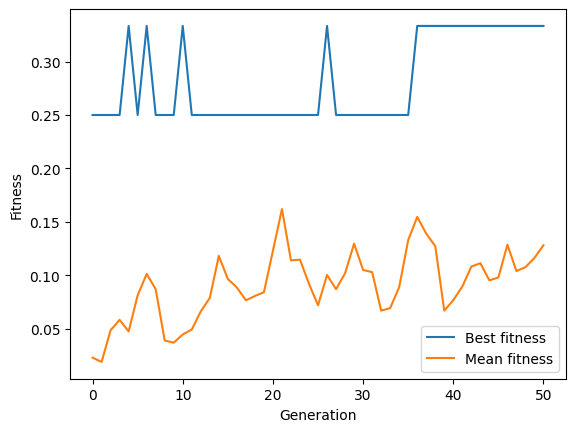

Median execution fitness evolution:


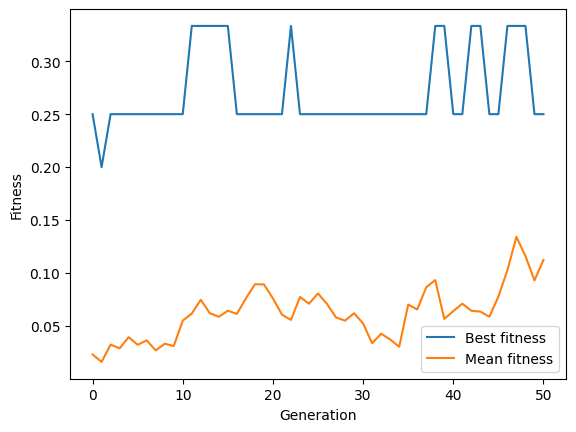

Worst execution fitness evolution:


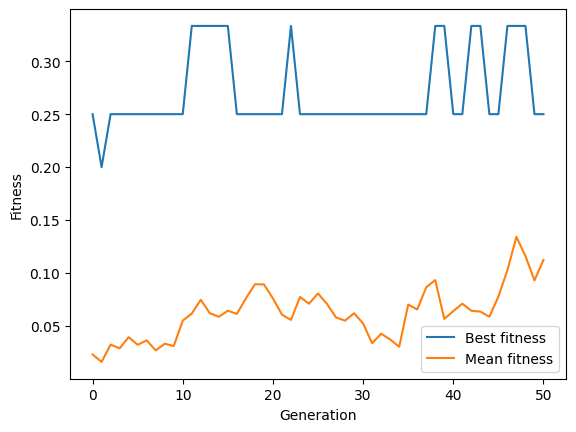

-------------Best Schedule--------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  |        | BD     | IA     |
| Hora 2  |        | BD     | BD     |
| Hora 3  |        | ALG    | ALG    |
Fitness: 0.3333333333333333
------------Median Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     | ALG    |        |
| Hora 2  |        | IA     | BD     |
| Hora 3  |        | BD     | ALG    |
Fitness: 0.25
-------------Worst Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     | ALG    |        |
| Hora 2  |        | IA     | BD     |
| Hora 3  |        | BD     | ALG    |
Fitness: 0.25


In [32]:
# Crear un conjunto de 31 semillas para los experimentos
seeds = [1234567890 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran
result = launch_experiment(seeds, dataset1, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times = result
# Recuerda también mostrar el horario de la mejor solución obtenida en los casos peor, mejor y mediano
print_results(best_individuals, best_inds_fitness, dataset1)

### Primera aproximación

Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic Algorithm with seed 1234567959
Running Genetic Algorithm with seed 1234567982
Running Genetic Algorithm with seed 1234568005
Running Genetic Algorithm with seed 1234568028
Running Genetic Algorithm with seed 1234568051
Running Genetic Algorithm with seed 1234568074
Running Genetic Algorithm with seed 1234568097
Running Genetic Algorithm with seed 1234568120
Running Genetic Algorithm with seed 1234568143
Running Genetic Algorithm with seed 1234568166
Running Genetic Algorithm with seed 1234568189
Running Genetic Algorithm with seed 1234568212
Running Genetic Algorithm with seed 1234568235
Running Genetic Algorithm with seed 1234568258
Running Genetic Algorithm with seed 1234568281
Running Genetic Algorithm with seed 1234568304
Running Genetic Algorithm with seed 1234568327
Running Genetic Algorithm with seed 1234568350
Running Genet

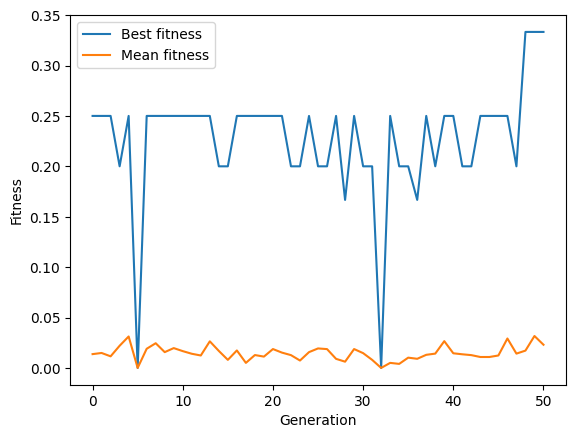

Median execution fitness evolution:


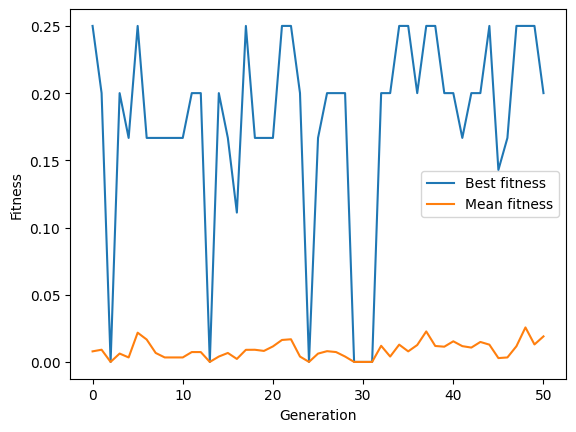

Worst execution fitness evolution:


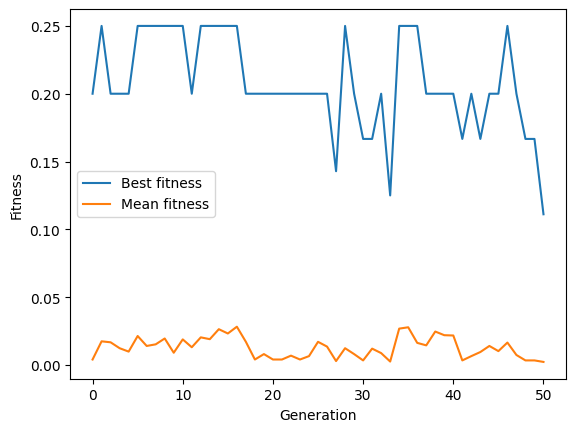

-------------Best Schedule--------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     | IA     |        |
| Hora 2  | BD     | POO    |        |
| Hora 3  | POO    | ALG    |        |
| Hora 4  | ALG    | BD     |        |
Fitness: 0.3333333333333333
------------Median Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | ALG    | POO    | BD     |
| Hora 2  |        | BD     | BD     |
| Hora 3  |        | POO    | ALG    |
| Hora 4  |        |        | IA     |
Fitness: 0.2
-------------Worst Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | IA     |        | POO    |
| Hora 2  | BD     | ALG    | BD     |
| Hora 3  |        |        | POO    |
| Hora 4  | BD     | ALG    |        |
Fitness: 0.1111111111111111


In [33]:
### Coloca aquí tus experimentos ###

# Datase 2
dataset_usado = dataset2

# Crear un conjunto de 31 semillas para los experimentos
seeds = [1234567890 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran
result = launch_experiment(seeds, dataset_usado, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times = result
# Recuerda también mostrar el horario de la mejor solución obtenida en los casos peor, mejor y mediano
print_results(best_individuals, best_inds_fitness, dataset_usado)

Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic Algorithm with seed 1234567959
Running Genetic Algorithm with seed 1234567982
Running Genetic Algorithm with seed 1234568005
Running Genetic Algorithm with seed 1234568028
Running Genetic Algorithm with seed 1234568051
Running Genetic Algorithm with seed 1234568074
Running Genetic Algorithm with seed 1234568097
Running Genetic Algorithm with seed 1234568120
Running Genetic Algorithm with seed 1234568143
Running Genetic Algorithm with seed 1234568166
Running Genetic Algorithm with seed 1234568189
Running Genetic Algorithm with seed 1234568212
Running Genetic Algorithm with seed 1234568235
Running Genetic Algorithm with seed 1234568258
Running Genetic Algorithm with seed 1234568281
Running Genetic Algorithm with seed 1234568304
Running Genetic Algorithm with seed 1234568327
Running Genetic Algorithm with seed 1234568350
Running Genet

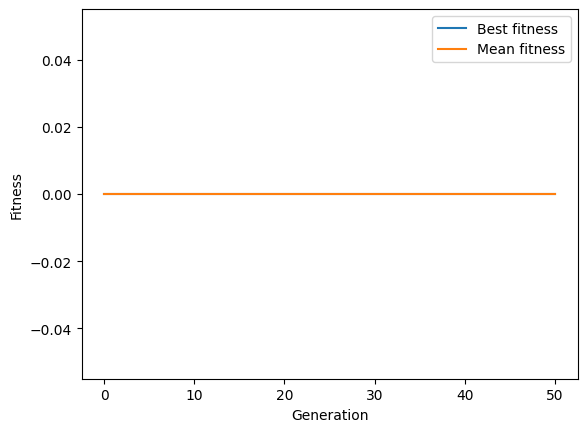

Median execution fitness evolution:


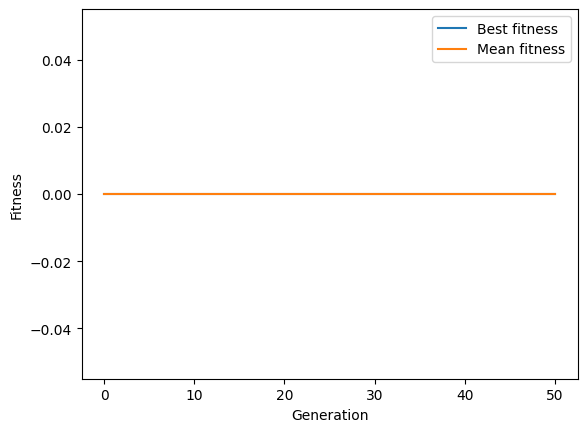

Worst execution fitness evolution:


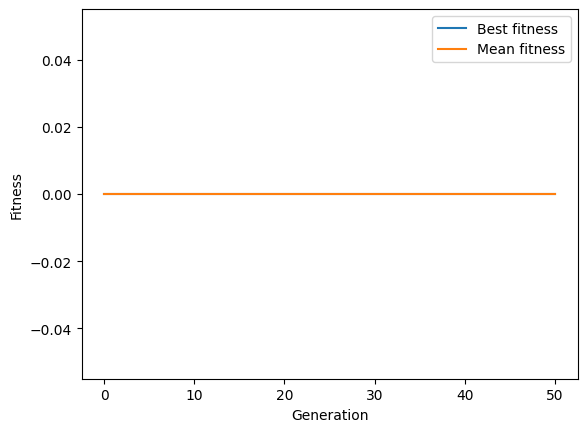

-------------Best Schedule--------------
|         | Día 1          | Día 2          | Día 3          | Día 4          |
|---------|----------------|----------------|----------------|----------------|
| Hora 1  |                |                |                | BD             |
| Hora 2  | ALG/BD         | POO            |                | IA/BD/BD       |
| Hora 3  | BD             | ALG/BD         | ALG            | IA/ALG/POO/POO |
| Hora 4  | POO            |                |                |                |
Fitness: 0
------------Median Schedule-------------
|         | Día 1          | Día 2          | Día 3          | Día 4          |
|---------|----------------|----------------|----------------|----------------|
| Hora 1  |                |                |                | BD             |
| Hora 2  | ALG/BD         | POO            |                | IA/BD/BD       |
| Hora 3  | BD             | ALG/BD         | ALG            | IA/ALG/POO/POO |
| Hora 4  | POO            

In [34]:

# Datase 3
dataset_usado = dataset3

# Crear un conjunto de 31 semillas para los experimentos
seeds = [1234567890 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran
result = launch_experiment(seeds, dataset_usado, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times = result
# Recuerda también mostrar el horario de la mejor solución obtenida en los casos peor, mejor y mediano
print_results(best_individuals, best_inds_fitness, dataset_usado)

Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic Algorithm with seed 1234567959
Running Genetic Algorithm with seed 1234567982
Running Genetic Algorithm with seed 1234568005
Running Genetic Algorithm with seed 1234568028
Running Genetic Algorithm with seed 1234568051
Running Genetic Algorithm with seed 1234568074
Running Genetic Algorithm with seed 1234568097
Running Genetic Algorithm with seed 1234568120
Running Genetic Algorithm with seed 1234568143
Running Genetic Algorithm with seed 1234568166
Running Genetic Algorithm with seed 1234568189
Running Genetic Algorithm with seed 1234568212
Running Genetic Algorithm with seed 1234568235
Running Genetic Algorithm with seed 1234568258
Running Genetic Algorithm with seed 1234568281
Running Genetic Algorithm with seed 1234568304
Running Genetic Algorithm with seed 1234568327
Running Genetic Algorithm with seed 1234568350
Running Genet

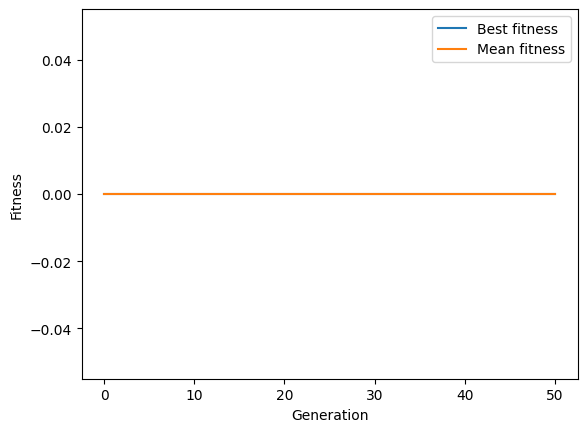

Median execution fitness evolution:


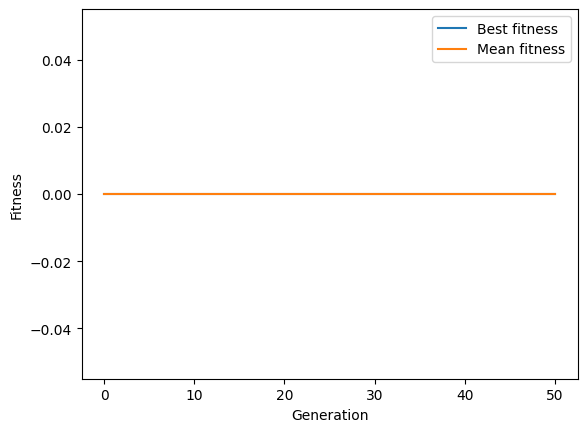

Worst execution fitness evolution:


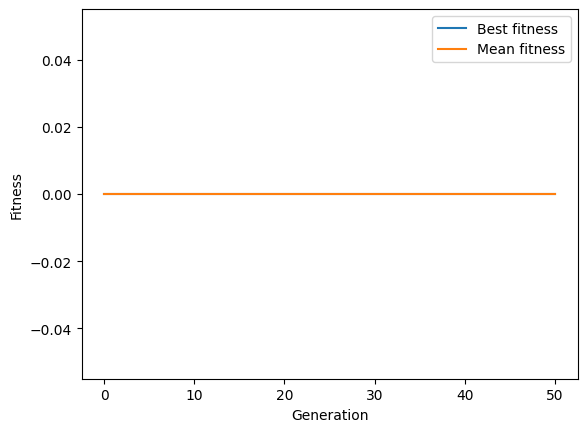

-------------Best Schedule--------------
|         | Día 1      | Día 2      | Día 3      | Día 4      |
|---------|------------|------------|------------|------------|
| Hora 1  |            |            |            | AC         |
| Hora 2  | BD         |            | BD         | BD         |
| Hora 3  | BD/POO/POO | BD/POO     |            |            |
| Hora 4  | ALG/POO    | AC         | ALG        |            |
| Hora 5  | AC/AC      |            |            |            |
| Hora 6  | ALG/ALG    | BD         |            | IA/IA      |
Fitness: 0
------------Median Schedule-------------
|         | Día 1      | Día 2      | Día 3      | Día 4      |
|---------|------------|------------|------------|------------|
| Hora 1  |            |            |            | AC         |
| Hora 2  | BD         |            | BD         | BD         |
| Hora 3  | BD/POO/POO | BD/POO     |            |            |
| Hora 4  | ALG/POO    | AC         | ALG        |            |
| Hora 5  |

In [35]:

# Datase 4
dataset_usado = dataset4

# Crear un conjunto de 31 semillas para los experimentos
seeds = [1234567890 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran
result = launch_experiment(seeds, dataset_usado, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times = result
# Recuerda también mostrar el horario de la mejor solución obtenida en los casos peor, mejor y mediano
print_results(best_individuals, best_inds_fitness, dataset_usado)

Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic Algorithm with seed 1234567959
Running Genetic Algorithm with seed 1234567982
Running Genetic Algorithm with seed 1234568005
Running Genetic Algorithm with seed 1234568028
Running Genetic Algorithm with seed 1234568051
Running Genetic Algorithm with seed 1234568074
Running Genetic Algorithm with seed 1234568097
Running Genetic Algorithm with seed 1234568120
Running Genetic Algorithm with seed 1234568143
Running Genetic Algorithm with seed 1234568166
Running Genetic Algorithm with seed 1234568189
Running Genetic Algorithm with seed 1234568212
Running Genetic Algorithm with seed 1234568235
Running Genetic Algorithm with seed 1234568258
Running Genetic Algorithm with seed 1234568281
Running Genetic Algorithm with seed 1234568304
Running Genetic Algorithm with seed 1234568327
Running Genetic Algorithm with seed 1234568350
Running Genet

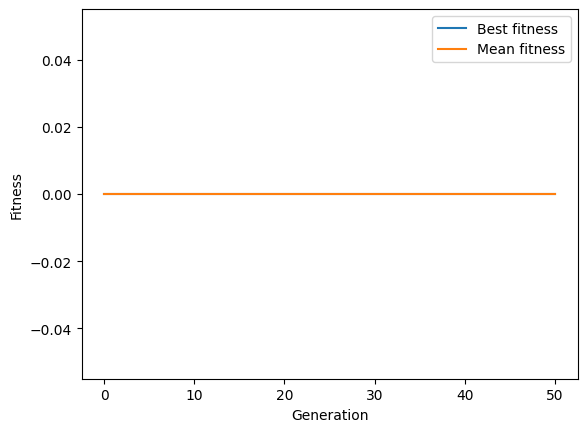

Median execution fitness evolution:


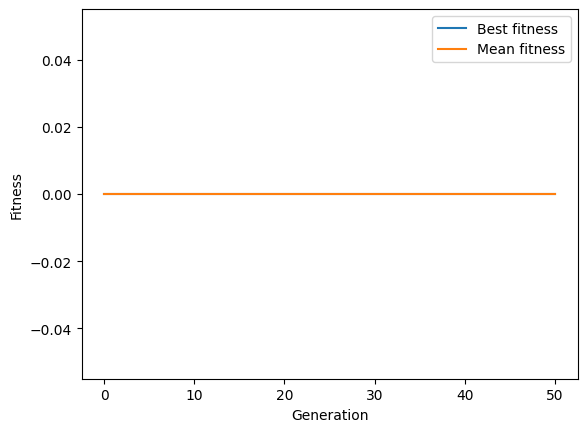

Worst execution fitness evolution:


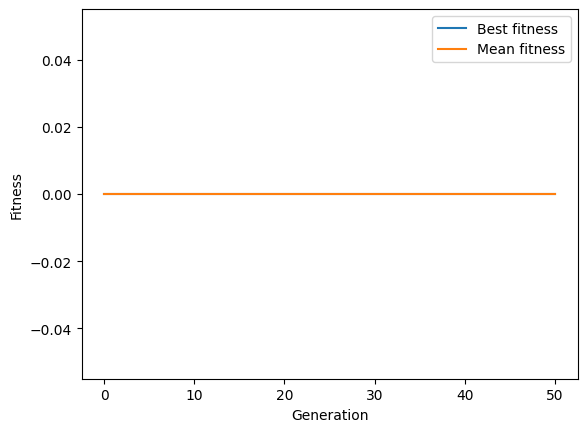

-------------Best Schedule--------------
|         | Día 1      | Día 2      | Día 3      | Día 4      |
|---------|------------|------------|------------|------------|
| Hora 1  | IA         | AC/TP      |            | BD         |
| Hora 2  | POO        |            |            | ALG        |
| Hora 3  | AC         |            |            | IA/POO     |
| Hora 4  | BD         | BD         | BD/BD/FP   |            |
| Hora 5  |            | FP         |            |            |
| Hora 6  | ALG/POO/AC |            |            | BD         |
| Hora 7  | FP/FP      | TP         | AC         | ALG        |
| Hora 8  |            |            |            | ALG/POO    |
Fitness: 0
------------Median Schedule-------------
|         | Día 1      | Día 2      | Día 3      | Día 4      |
|---------|------------|------------|------------|------------|
| Hora 1  | IA         | AC/TP      |            | BD         |
| Hora 2  | POO        |            |            | ALG        |
| Hora 3  |

In [36]:

# Datase 5
dataset_usado = dataset5

# Crear un conjunto de 31 semillas para los experimentos
seeds = [1234567890 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran
result = launch_experiment(seeds, dataset_usado, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times = result
# Recuerda también mostrar el horario de la mejor solución obtenida en los casos peor, mejor y mediano
print_results(best_individuals, best_inds_fitness, dataset_usado)

Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic Algorithm with seed 1234567959
Running Genetic Algorithm with seed 1234567982
Running Genetic Algorithm with seed 1234568005
Running Genetic Algorithm with seed 1234568028
Running Genetic Algorithm with seed 1234568051
Running Genetic Algorithm with seed 1234568074
Running Genetic Algorithm with seed 1234568097
Running Genetic Algorithm with seed 1234568120
Running Genetic Algorithm with seed 1234568143
Running Genetic Algorithm with seed 1234568166
Running Genetic Algorithm with seed 1234568189
Running Genetic Algorithm with seed 1234568212
Running Genetic Algorithm with seed 1234568235
Running Genetic Algorithm with seed 1234568258
Running Genetic Algorithm with seed 1234568281
Running Genetic Algorithm with seed 1234568304
Running Genetic Algorithm with seed 1234568327
Running Genetic Algorithm with seed 1234568350
Running Genet

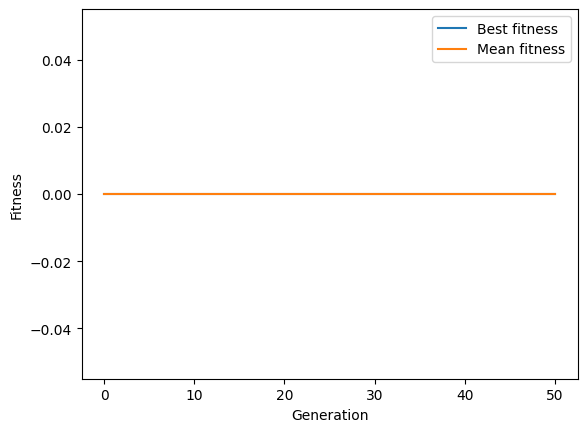

Median execution fitness evolution:


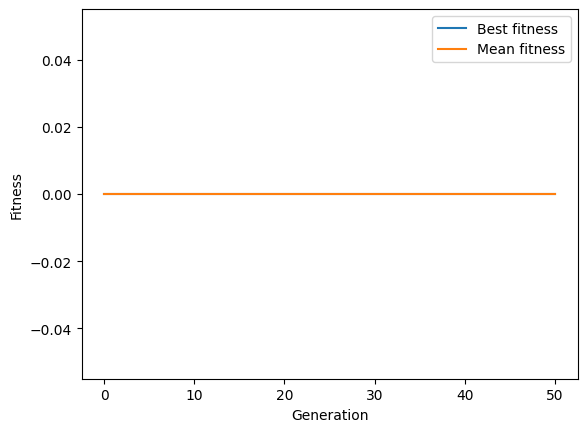

Worst execution fitness evolution:


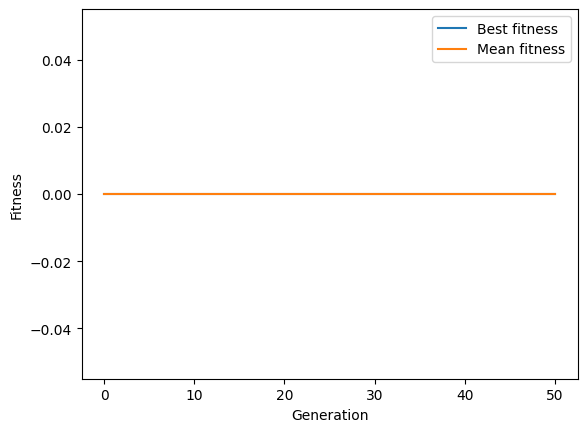

-------------Best Schedule--------------
|         | Día 1  | Día 2  | Día 3  | Día 4  | Día 5  |
|---------|--------|--------|--------|--------|--------|
| Hora 1  |        |        | BD     | TSO    |        |
| Hora 2  |        |        | TSO    | ALG    |        |
| Hora 3  | LMD    |        | BD/FC  | BD     |        |
| Hora 4  | FP     |        |        |        |        |
| Hora 5  |        |        | POO    | FC/LMD |        |
| Hora 6  |        | ALG    | FC/LMD | TP     | AM     |
| Hora 7  | AC/TP  | FC/AM  |        |        | AM     |
| Hora 8  | POO    | ALG    | LMD    |        | ALG    |
| Hora 9  | IA     |        |        | AC     |        |
| Hora 10 | BD/FP  |        |        |        | POO    |
| Hora 11 | POO/FP | IA/FP  |        | BD     |        |
| Hora 12 |        | BD     | AC/AM  |        | AC     |
Fitness: 0
------------Median Schedule-------------
|         | Día 1  | Día 2  | Día 3  | Día 4  | Día 5  |
|---------|--------|--------|--------|--------|-----

In [37]:

# Datase 6
dataset_usado = dataset6

# Crear un conjunto de 31 semillas para los experimentos
seeds = [1234567890 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran
result = launch_experiment(seeds, dataset_usado, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                  calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                  uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times = result
# Recuerda también mostrar el horario de la mejor solución obtenida en los casos peor, mejor y mediano
print_results(best_individuals, best_inds_fitness, dataset_usado)

**Resultados de la Primera Aproximación**

La tabla de resultados y una valoración crítica de los resultados.

# TODO: Xema y Cova revisar
#### Tabla de fitness
| Dataset | Mejor | Media | Peor |
|---------|-------|-------|------|
| 1       | 0.33  | 0.25  | 0.25 |
| 2       | 0.33  | 0.20  | 0.11 |
| 3       | 0.00  | 0.00  | 0.00 |
| 4       | 0.00  | 0.00  | 0.00 |
| 5       | 0.00  | 0.00  | 0.00 |
| 6       | 0.00  | 0.00  | 0.00 |

Como se aprecia en la tabla, cuanto mayor es el problema peor se desenvuelve el algoritmo con la configuración de la primera aproximación.

Aun teniendo una selection por torneo la cual filtra por mejor fitness vemos que no es suficiente para mejorar la fitness tras cada generación con un numero grande de elementos en la población


### Aproximaciones Propuestas

In [38]:
### Coloca aquí tus experimentos ###
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]


# Prueba con **cruce por orden**

+++++++++++++++++++ Dataset: 1 +++++++++++++++++++
Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic Algorithm with seed 1234567959
Running Genetic Algorithm with seed 1234567982
Running Genetic Algorithm with seed 1234568005
Running Genetic Algorithm with seed 1234568028
Running Genetic Algorithm with seed 1234568051
Running Genetic Algorithm with seed 1234568074
Running Genetic Algorithm with seed 1234568097
Running Genetic Algorithm with seed 1234568120
Running Genetic Algorithm with seed 1234568143
Running Genetic Algorithm with seed 1234568166
Running Genetic Algorithm with seed 1234568189
Running Genetic Algorithm with seed 1234568212
Running Genetic Algorithm with seed 1234568235
Running Genetic Algorithm with seed 1234568258
Running Genetic Algorithm with seed 1234568281
Running Genetic Algorithm with seed 1234568304
Running Genetic Algorithm with seed 1234568327
Running G

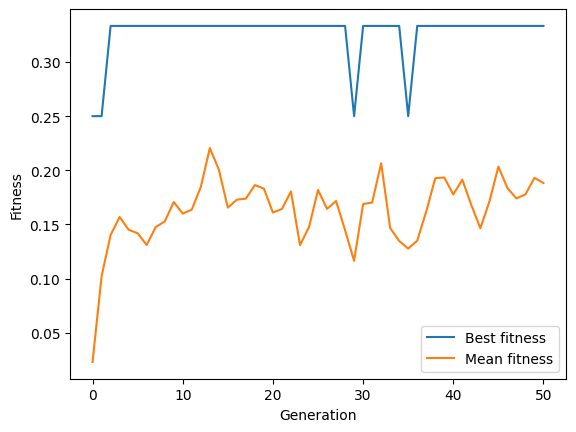

Median execution fitness evolution:


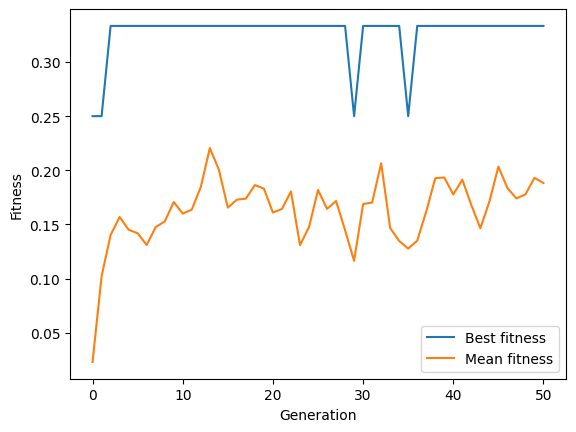

Worst execution fitness evolution:


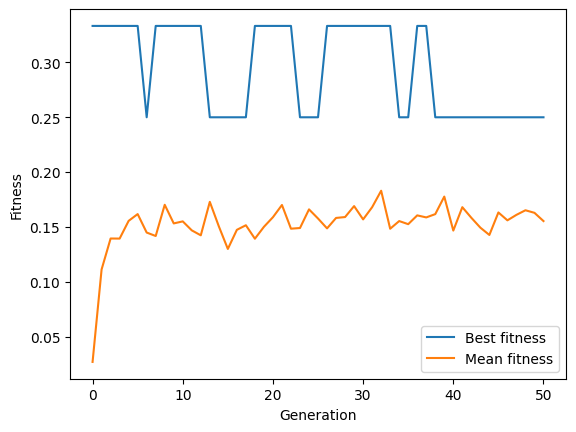

-------------Best Schedule--------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | ALG    |        | BD     |
| Hora 2  | ALG    |        | BD     |
| Hora 3  | BD     |        | IA     |
Fitness: 0.3333333333333333
------------Median Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | ALG    |        | BD     |
| Hora 2  | ALG    |        | BD     |
| Hora 3  | BD     |        | IA     |
Fitness: 0.3333333333333333
-------------Worst Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | IA     | ALG    |        |
| Hora 2  | BD     | BD     |        |
| Hora 3  | BD     |        | ALG    |
Fitness: 0.25
+++++++++++++++++++ Dataset: 2 +++++++++++++++++++
Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic Algorithm with

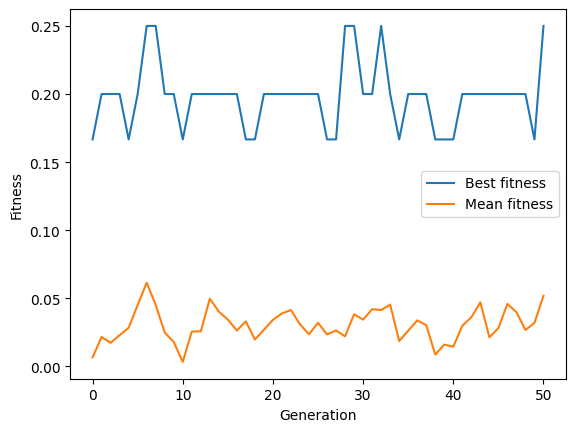

Median execution fitness evolution:


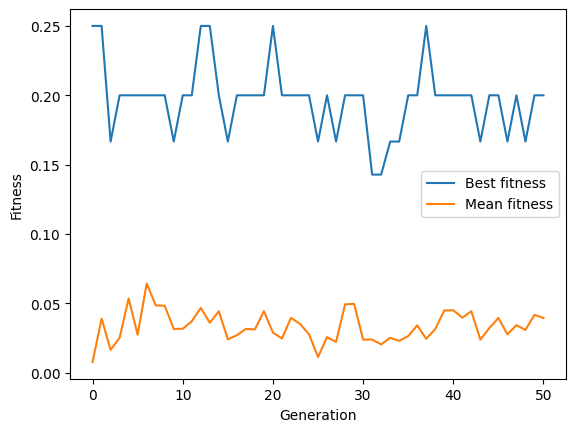

Worst execution fitness evolution:


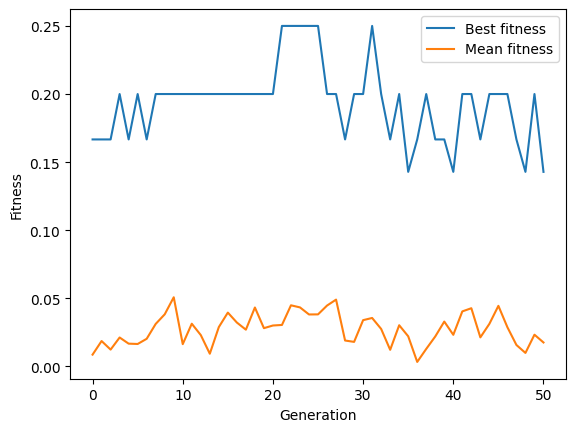

-------------Best Schedule--------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | IA     |        |        |
| Hora 2  | ALG    | ALG    |        |
| Hora 3  | BD     | POO    | POO    |
| Hora 4  | BD     | BD     |        |
Fitness: 0.25
------------Median Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     | BD     |        |
| Hora 2  | ALG    | BD     | ALG    |
| Hora 3  |        | IA     |        |
| Hora 4  |        | POO    | POO    |
Fitness: 0.2
-------------Worst Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     | ALG    | BD     |
| Hora 2  |        |        | ALG    |
| Hora 3  | IA     | POO    |        |
| Hora 4  |        | BD     | POO    |
Fitness: 0.14285714285714285
+++++++++++++++++++ Dataset: 3 +++++++++++++++++++
Running Genetic Algorithm with seed 1234567890
Running Genetic Algor

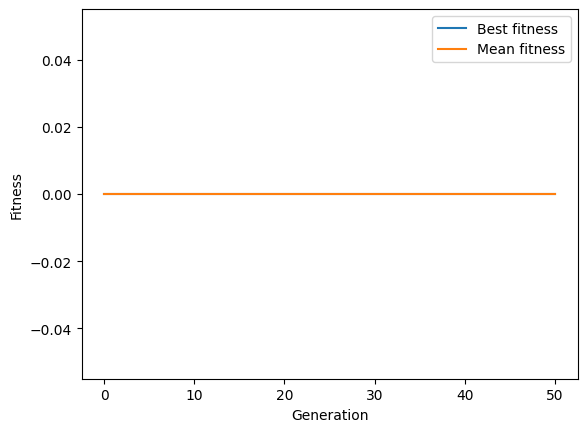

Median execution fitness evolution:


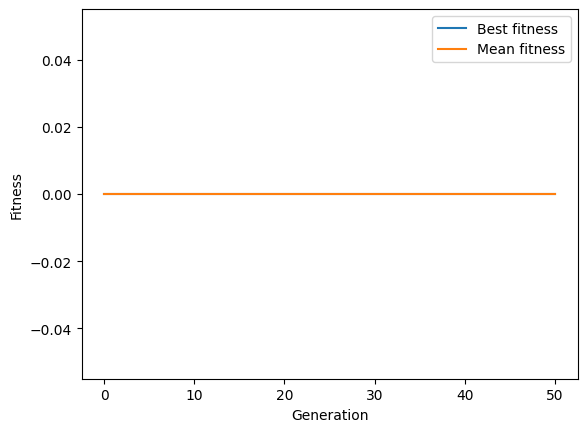

Worst execution fitness evolution:


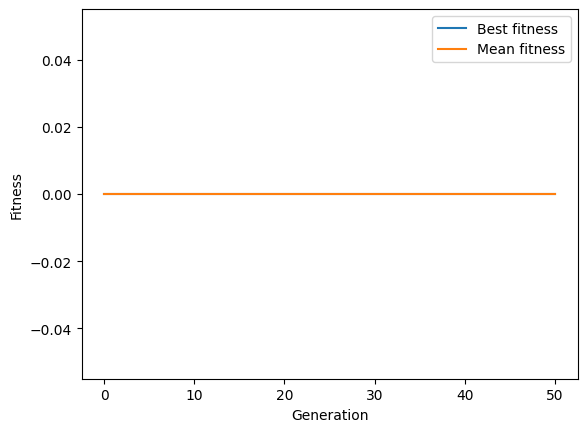

-------------Best Schedule--------------
|         | Día 1                   | Día 2                   | Día 3                   | Día 4                   |
|---------|-------------------------|-------------------------|-------------------------|-------------------------|
| Hora 1  | ALG                     | ALG/BD                  |                         | IA                      |
| Hora 2  |                         |                         |                         | POO                     |
| Hora 3  |                         | IA/BD                   |                         |                         |
| Hora 4  |                         | ALG                     | ALG                     | BD/BD/BD/BD/POO/POO/POO |
Fitness: 0
------------Median Schedule-------------
|         | Día 1                   | Día 2                   | Día 3                   | Día 4                   |
|---------|-------------------------|-------------------------|-------------------------|------

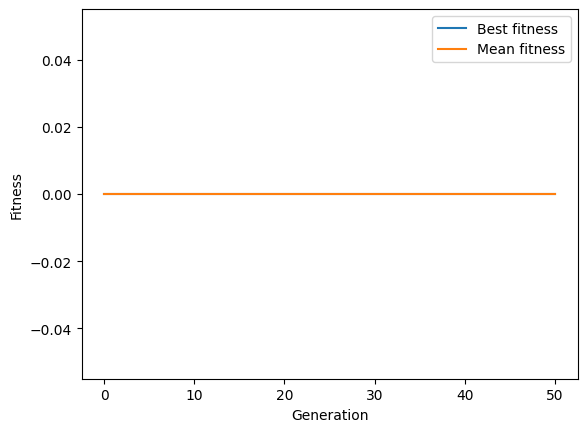

Median execution fitness evolution:


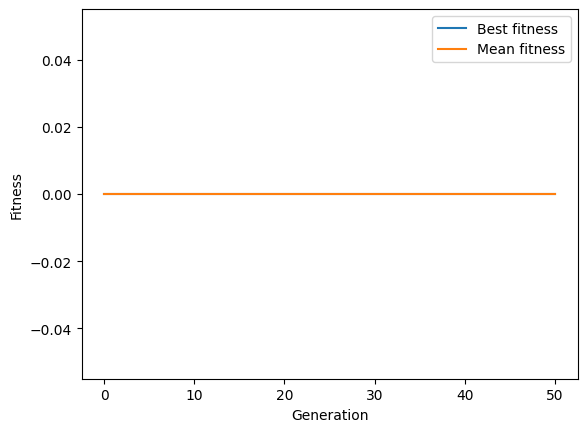

Worst execution fitness evolution:


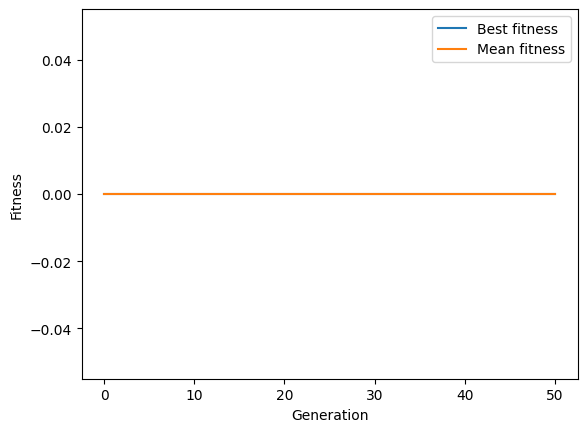

-------------Best Schedule--------------
|         | Día 1                            | Día 2                            | Día 3                            | Día 4                            |
|---------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|
| Hora 1  | IA                               | ALG/BD                           |                                  |                                  |
| Hora 2  | ALG                              |                                  |                                  | BD                               |
| Hora 3  |                                  |                                  | IA                               |                                  |
| Hora 4  | ALG                              |                                  |                                  |                                  |
| Hora 5  |                                  | 

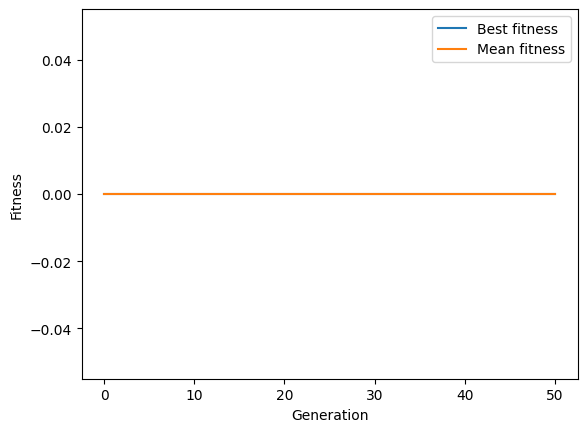

Median execution fitness evolution:


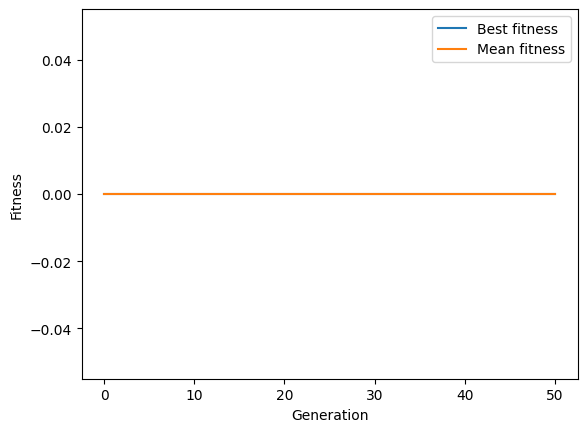

Worst execution fitness evolution:


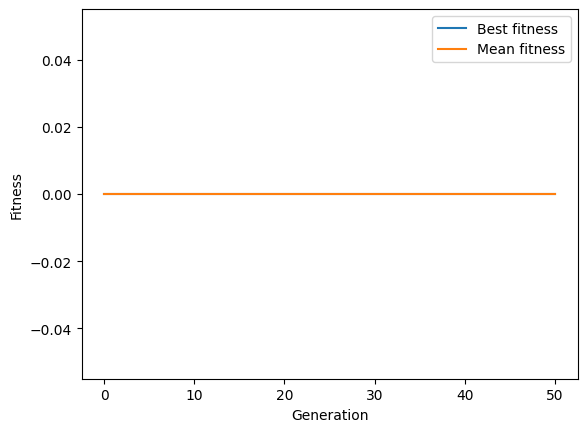

-------------Best Schedule--------------
|         | Día 1                                         | Día 2                                         | Día 3                                         | Día 4                                         |
|---------|-----------------------------------------------|-----------------------------------------------|-----------------------------------------------|-----------------------------------------------|
| Hora 1  | IA                                            |                                               | FP                                            |                                               |
| Hora 2  | AC                                            | ALG                                           | IA/ALG                                        |                                               |
| Hora 3  |                                               |                                               |                                    

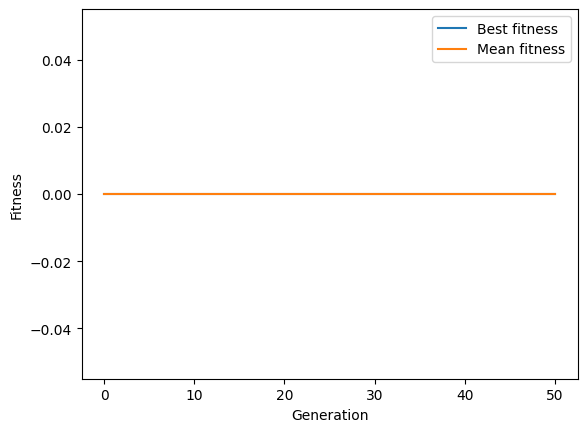

Median execution fitness evolution:


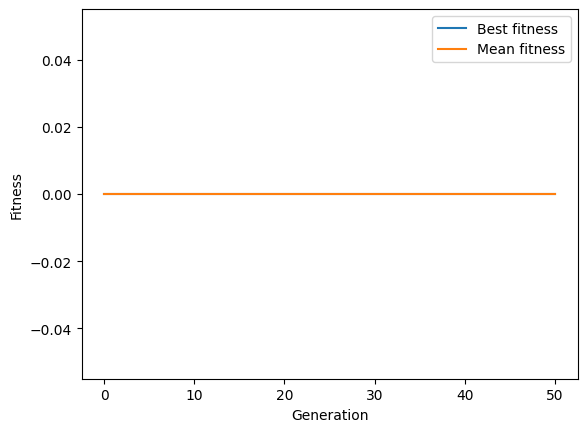

Worst execution fitness evolution:


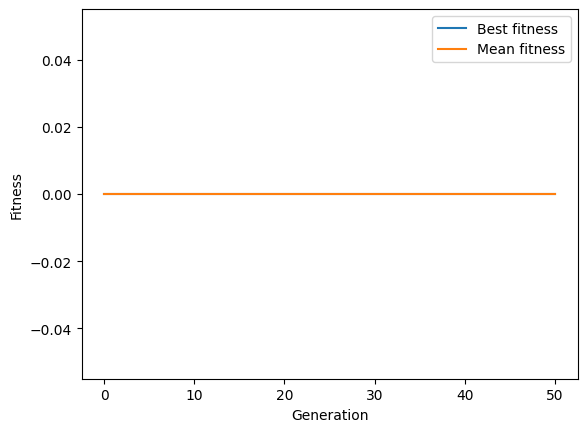

-------------Best Schedule--------------
|         | Día 1                                                                                    | Día 2                                                                                    | Día 3                                                                                    | Día 4                                                                                    | Día 5                                                                                    |
|---------|------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| Hora 1  |              

In [ ]:
# Prueba con cruce por orden
# Crear un conjunto de 31 semillas para los experimentos
seeds = [1234567890 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran
for i, dataset_usado in enumerate(datasets):
    print(f" Dataset: {i+1} ".center(50, "+"))
    result = launch_experiment(seeds, dataset_usado, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                    calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, cruce_por_orden, 0.8,
                    uniform_mutation, 0.1, generational_replacement, max_gen=50, tournament_size=2)
    best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times = result
    # Recuerda también mostrar el horario de la mejor solución obtenida en los casos peor, mejor y mediano
    print_results(best_individuals, best_inds_fitness, dataset_usado)

## Conclusion **cruce por orden**
# TODO: Xema y Cova revisar

Como se puede observar en la tabla, no se observan mejoras significativas


#### Tabla de fitness
| Dataset | Mejor | Media | Peor |
|---------|-------|-------|------|
| 1       | 0.33  | 0.33  | 0.25 |
| 2       | 0.25  | 0.20  | 0.14 |
| 3       | 0.00  | 0.00  | 0.00 |
| 4       | 0.00  | 0.00  | 0.00 |
| 5       | 0.00  | 0.00  | 0.00 |
| 6       | 0.00  | 0.00  | 0.00 |

# Prueba con **remplazo generacional con elitismo**

+++++++++++++++++++ Dataset: 1 +++++++++++++++++++
Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic Algorithm with seed 1234567959
Running Genetic Algorithm with seed 1234567982
Running Genetic Algorithm with seed 1234568005
Running Genetic Algorithm with seed 1234568028
Running Genetic Algorithm with seed 1234568051
Running Genetic Algorithm with seed 1234568074
Running Genetic Algorithm with seed 1234568097
Running Genetic Algorithm with seed 1234568120
Running Genetic Algorithm with seed 1234568143
Running Genetic Algorithm with seed 1234568166
Running Genetic Algorithm with seed 1234568189
Running Genetic Algorithm with seed 1234568212
Running Genetic Algorithm with seed 1234568235
Running Genetic Algorithm with seed 1234568258
Running Genetic Algorithm with seed 1234568281
Running Genetic Algorithm with seed 1234568304
Running Genetic Algorithm with seed 1234568327
Running G

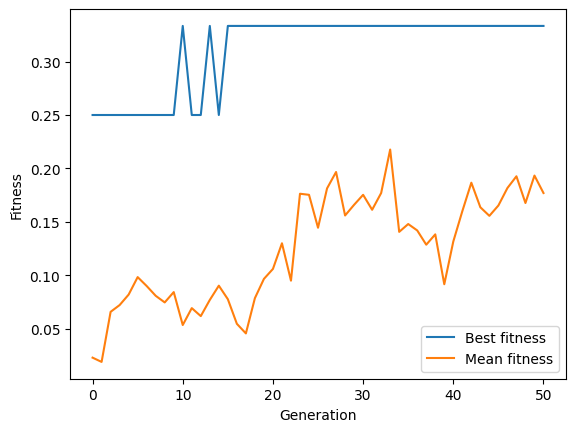

Median execution fitness evolution:


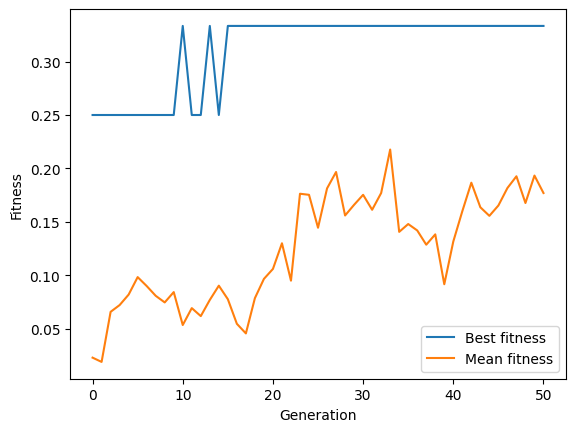

Worst execution fitness evolution:


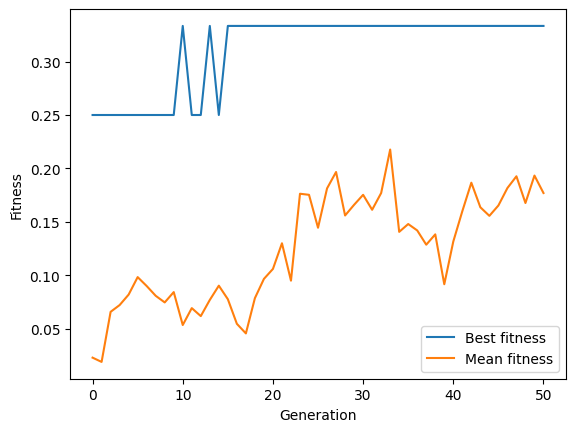

-------------Best Schedule--------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     | BD     |        |
| Hora 2  | ALG    | BD     |        |
| Hora 3  | IA     | ALG    |        |
Fitness: 0.3333333333333333
------------Median Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     | BD     |        |
| Hora 2  | ALG    | BD     |        |
| Hora 3  | IA     | ALG    |        |
Fitness: 0.3333333333333333
-------------Worst Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | BD     | BD     |        |
| Hora 2  | ALG    | BD     |        |
| Hora 3  | IA     | ALG    |        |
Fitness: 0.3333333333333333
+++++++++++++++++++ Dataset: 2 +++++++++++++++++++
Running Genetic Algorithm with seed 1234567890
Running Genetic Algorithm with seed 1234567913
Running Genetic Algorithm with seed 1234567936
Running Genetic 

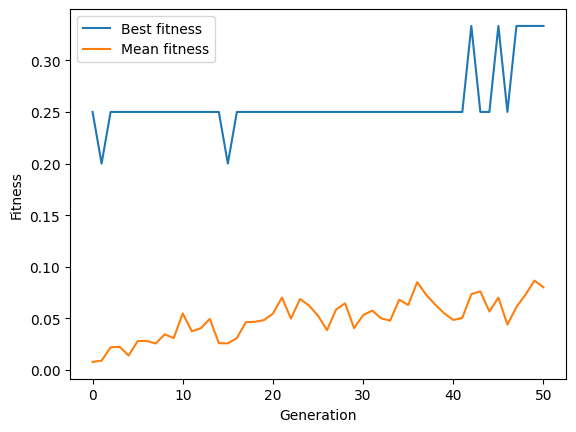

Median execution fitness evolution:


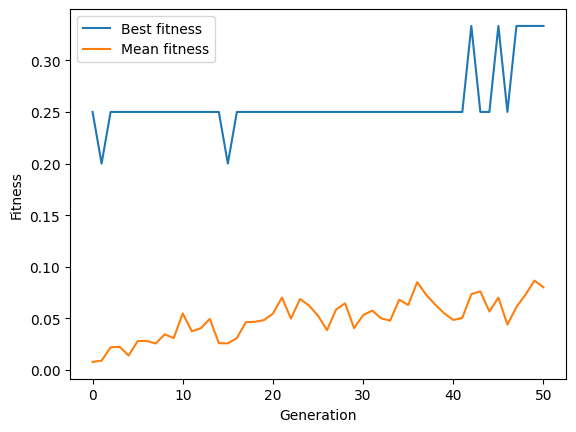

Worst execution fitness evolution:


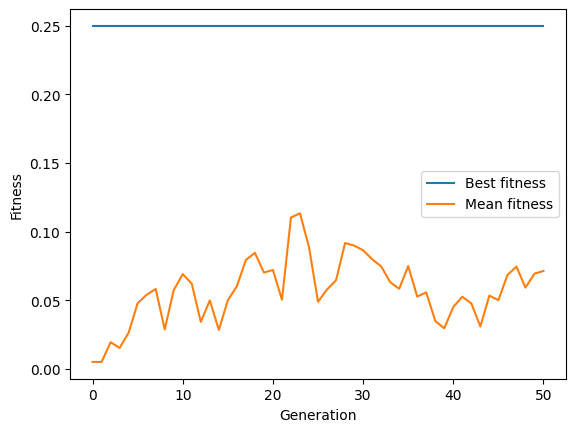

-------------Best Schedule--------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | IA     |        | BD     |
| Hora 2  | BD     |        | POO    |
| Hora 3  | BD     |        | ALG    |
| Hora 4  | POO    |        | ALG    |
Fitness: 0.3333333333333333
------------Median Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | IA     |        | BD     |
| Hora 2  | BD     |        | POO    |
| Hora 3  | BD     |        | ALG    |
| Hora 4  | POO    |        | ALG    |
Fitness: 0.3333333333333333
-------------Worst Schedule-------------
|         | Día 1  | Día 2  | Día 3  |
|---------|--------|--------|--------|
| Hora 1  | POO    |        |        |
| Hora 2  | ALG    |        | BD     |
| Hora 3  | IA     | BD     | BD     |
| Hora 4  |        | ALG    | POO    |
Fitness: 0.25
+++++++++++++++++++ Dataset: 3 +++++++++++++++++++
Running Genetic Algorithm with seed 1234567890
Running

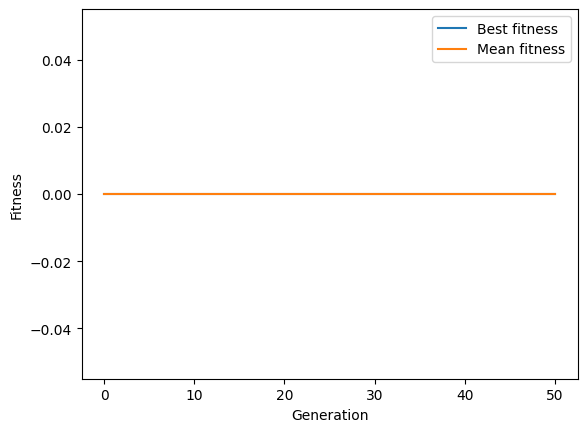

Median execution fitness evolution:


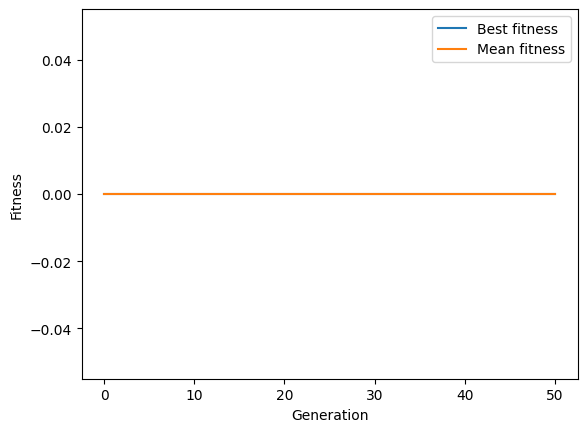

Worst execution fitness evolution:


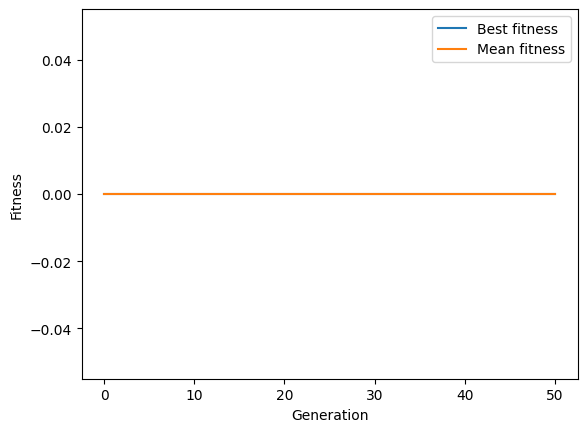

-------------Best Schedule--------------
|         | Día 1      | Día 2      | Día 3      | Día 4      |
|---------|------------|------------|------------|------------|
| Hora 1  | POO        | POO        |            | ALG/BD/POO |
| Hora 2  | BD         |            | BD/BD      |            |
| Hora 3  | IA         | ALG        | POO        | BD         |
| Hora 4  | ALG        |            | BD         | IA/ALG     |
Fitness: 0
------------Median Schedule-------------
|         | Día 1      | Día 2      | Día 3      | Día 4      |
|---------|------------|------------|------------|------------|
| Hora 1  | POO        | POO        |            | ALG/BD/POO |
| Hora 2  | BD         |            | BD/BD      |            |
| Hora 3  | IA         | ALG        | POO        | BD         |
| Hora 4  | ALG        |            | BD         | IA/ALG     |
Fitness: 0
-------------Worst Schedule-------------
|         | Día 1      | Día 2      | Día 3      | Día 4      |
|---------|------------

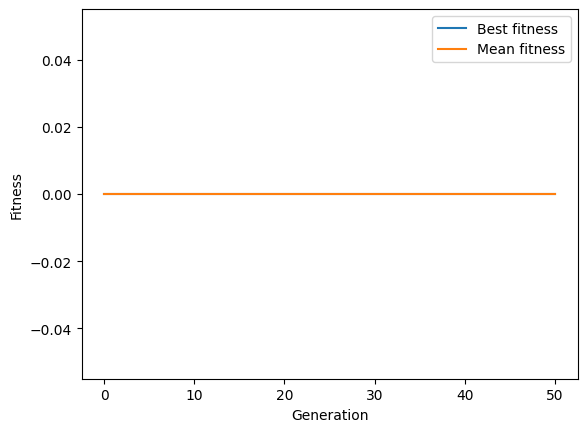

Median execution fitness evolution:


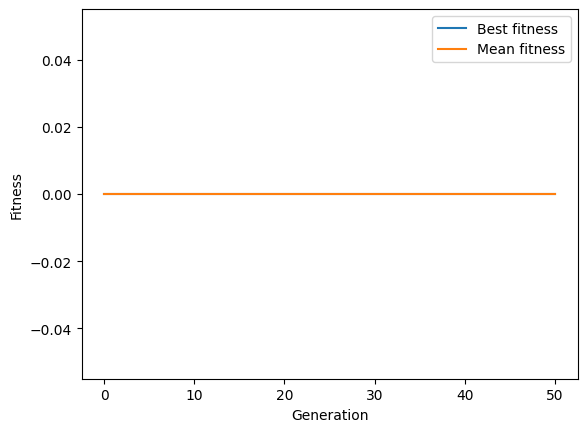

Worst execution fitness evolution:


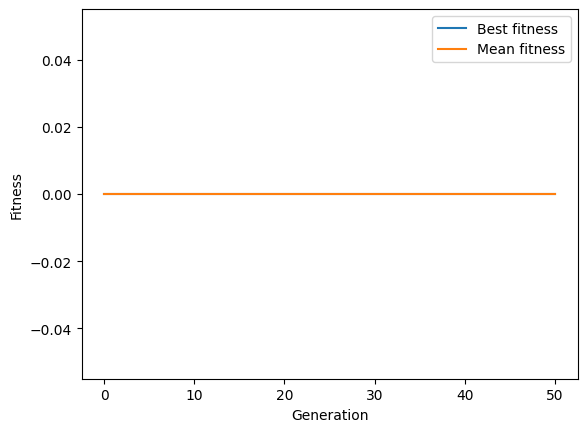

-------------Best Schedule--------------
|         | Día 1      | Día 2      | Día 3      | Día 4      |
|---------|------------|------------|------------|------------|
| Hora 1  | POO        | IA/POO     | ALG/BD/POO |            |
| Hora 2  | ALG        |            |            | ALG/AC     |
| Hora 3  | IA         |            | BD         |            |
| Hora 4  |            | BD/BD      | ALG        |            |
| Hora 5  | BD/POO     |            | AC         |            |
| Hora 6  | AC         | BD         |            | AC         |
Fitness: 0
------------Median Schedule-------------
|         | Día 1      | Día 2      | Día 3      | Día 4      |
|---------|------------|------------|------------|------------|
| Hora 1  | POO        | IA/POO     | ALG/BD/POO |            |
| Hora 2  | ALG        |            |            | ALG/AC     |
| Hora 3  | IA         |            | BD         |            |
| Hora 4  |            | BD/BD      | ALG        |            |
| Hora 5  |

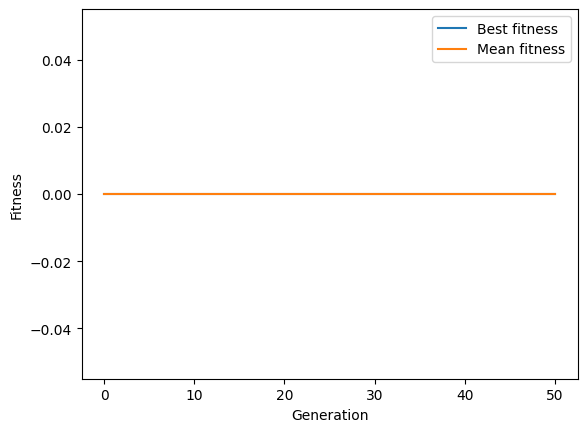

Median execution fitness evolution:


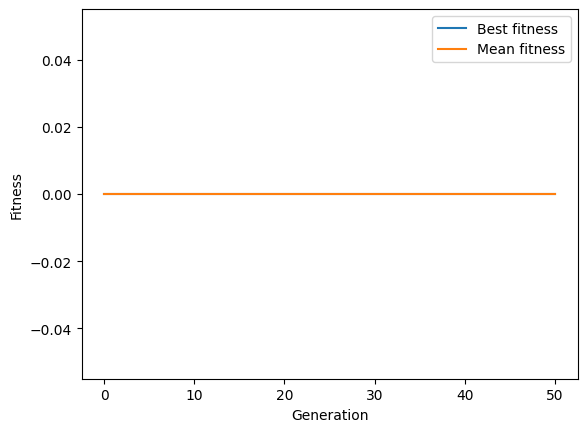

Worst execution fitness evolution:


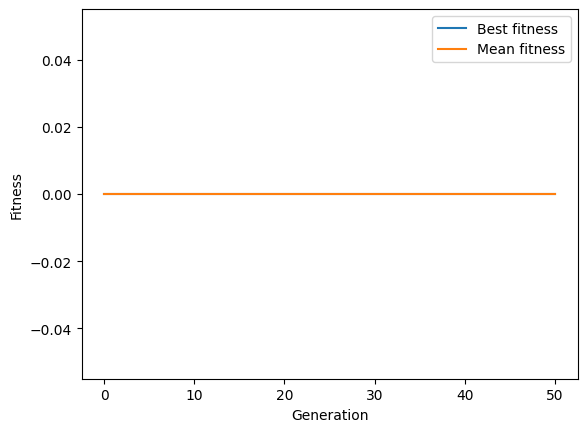

-------------Best Schedule--------------
|         | Día 1      | Día 2      | Día 3      | Día 4      |
|---------|------------|------------|------------|------------|
| Hora 1  | POO        |            | FP         |            |
| Hora 2  | BD         | BD/BD      |            | AC         |
| Hora 3  | IA         |            |            | POO        |
| Hora 4  |            | BD         | ALG/TP     | TP         |
| Hora 5  | POO/AC     | ALG/POO/FP |            | BD         |
| Hora 6  |            |            |            |            |
| Hora 7  | ALG/AC     | BD         |            |            |
| Hora 8  |            | ALG        | FP         | IA/AC/FP   |
Fitness: 0
------------Median Schedule-------------
|         | Día 1      | Día 2      | Día 3      | Día 4      |
|---------|------------|------------|------------|------------|
| Hora 1  | POO        |            | FP         |            |
| Hora 2  | BD         | BD/BD      |            | AC         |
| Hora 3  |

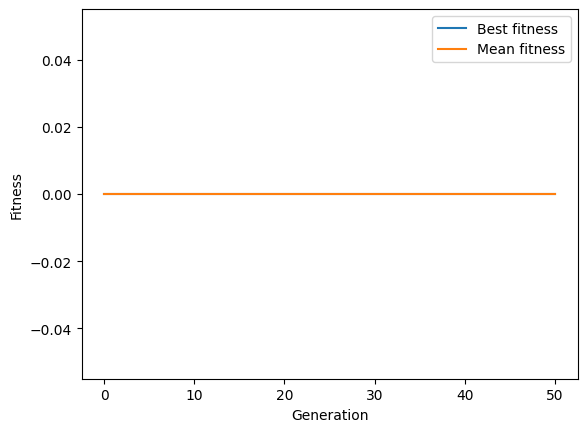

Median execution fitness evolution:


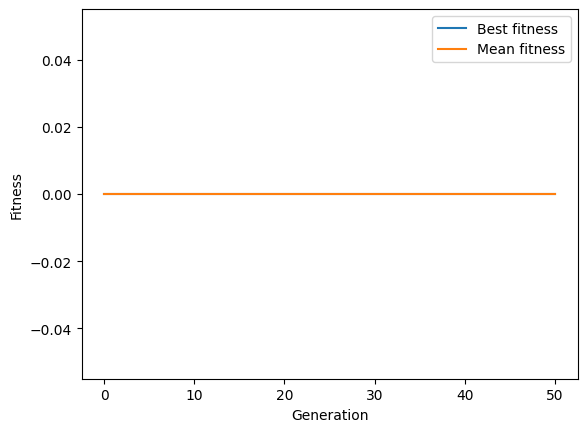

Worst execution fitness evolution:


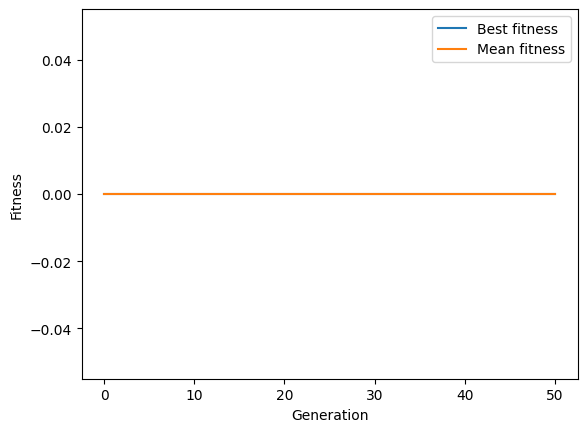

-------------Best Schedule--------------
|         | Día 1        | Día 2        | Día 3        | Día 4        | Día 5        |
|---------|--------------|--------------|--------------|--------------|--------------|
| Hora 1  |              | ALG          |              | AC           |              |
| Hora 2  | FP/TSO       |              |              | FP           |              |
| Hora 3  | IA           | BD           |              | IA/POO       |              |
| Hora 4  |              | TP           | FP           | AM           | ALG/FP       |
| Hora 5  | BD           | AC           |              |              |              |
| Hora 6  |              | AM           |              | BD           | TSO          |
| Hora 7  |              |              |              |              | TP           |
| Hora 8  |              | FC           | LMD          | BD/AM        |              |
| Hora 9  |              |              | POO          | BD/AC/FC/LMD | FC           |
| 

In [41]:
# Prueba con remplazo generacional con elitismo
# Crear un conjunto de 31 semillas para los experimentos
seeds = [1234567890 + i*23 for i in range(31)] # Semillas de ejemplo, cambiar por las semillas que se quieran
for i, dataset_usado in enumerate(datasets):
    print(f" Dataset: {i+1} ".center(50, "+"))
    result = launch_experiment(seeds, dataset_usado, generate_initial_population_timetabling, 50, fitness_timetabling, calculate_c1, calculate_c2,
                    calculate_p1, calculate_p2, calculate_p3, generation_stop, 50, tournament_selection, one_point_crossover, 0.8,
                    uniform_mutation, 0.1, generational_replacement_with_elitism, max_gen=50, tournament_size=2, elitism=5)
    best_individuals, best_inds_fitness, best_fitnesses, mean_fitnesses, last_generations, execution_times = result
    # Recuerda también mostrar el horario de la mejor solución obtenida en los casos peor, mejor y mediano
    print_results(best_individuals, best_inds_fitness, dataset_usado)

## Conclusion **remplazo generacional con elitismo**
# TODO: Xema y Cova revisar

Como se puede observar en la tabla, se aprecian mejoras de la fitness para los datasets pequeños, pero seguimos sin avances en los datasets de mayor tamaño


#### Tabla de fitness
| Dataset | Mejor | Media | Peor |
|---------|-------|-------|------|
| 1       | 0.33  | 0.33  | 0.33 |
| 2       | 0.33  | 0.33  | 0.25 |
| 3       | 0.00  | 0.00  | 0.00 |
| 4       | 0.00  | 0.00  | 0.00 |
| 5       | 0.00  | 0.00  | 0.00 |
| 6       | 0.00  | 0.00  | 0.00 |

**Resultados de Aproximaciones Propuestas**

**--> Incluye aquí <--**

Una tabla por cada aproximación propuesta y una valoración crítica de los resultados.

## Conclusiones

**--> Incluye aquí <--**

Tabla comparativa entre la primera aproximación y las aproximaciones propuestas, añade una valoración crítica de los resultados, especificando las diferencias que encuentres, ventajas de las diferentes aproximaciones, el efecto de la configuración del problema, etc.